# Project: Advanced Lane Finding
##### A Udacity Self-Driving Car Nanodegree Project

#### Matthew Zimmer's Classroom Notes

In [1]:
from IPython.display import YouTubeVideo
def render_youtube_video(video_id, width=880, height=495):
    return YouTubeVideo(video_id, width=width, height=height)

### 1. Welcome to Computer Vision

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/016c6236-7f8c-4c07-8232-a3d099c5454a)

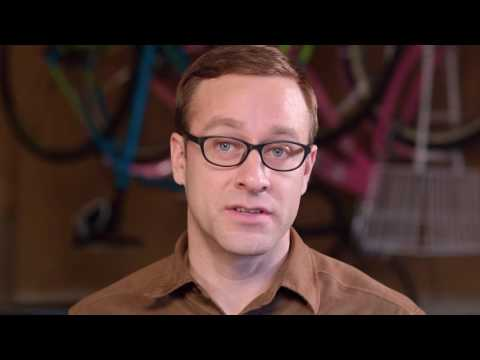

In [2]:
render_youtube_video('fODI-1r28rM')

### 2. Overview

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/e062a773-7e10-4e7e-8b77-668bdc6d54dc)

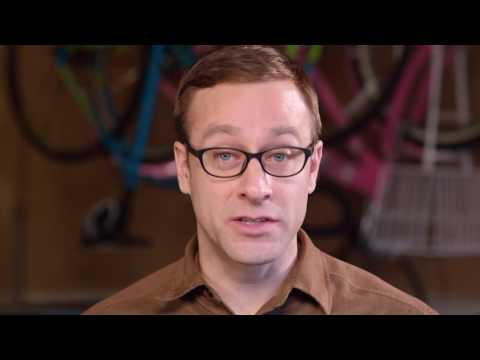

In [3]:
render_youtube_video('yN7u0qmJDhA')

### 3. Getting Started

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/37263c47-2d5a-4914-a132-182c70b9f970)

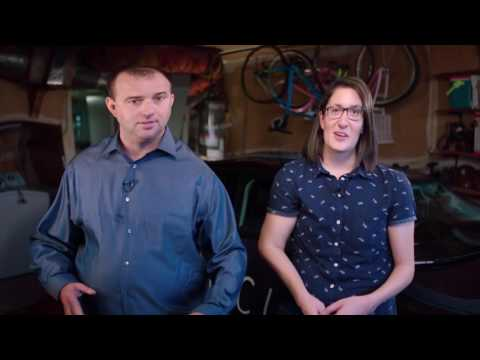

In [4]:
render_youtube_video('0zlyx5nL8Uo')

### 4. Distortion Correction
#### Distortion

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/77d68b8f-f3e4-4305-8459-560897465a0f)

Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image; this transformation isn’t perfect. Distortion actually changes what the shape and size of these 3D objects appear to be. So, the first step in analyzing camera images, is to undo this distortion so that you can get correct and useful information out of them.

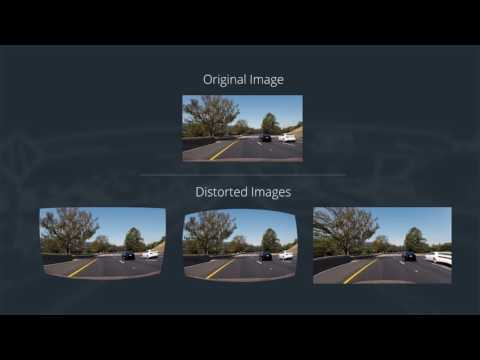

In [5]:
render_youtube_video('Bv3o0INBQIU')

### 5. Quiz: Effects of Distortion
#### QUIZ QUESTION

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/667e0951-99ed-4b8f-b972-3b5614aac3b8)

###### Why is it important to correct for image distortion?

* [X] Distortion can change the apparent size of an object in an image.

* [X] Distortion can change the apparent shape of an object in an image.

* [X] Distortion can cause an object's appearance to change depending on where it is in the field of view.

* [X] Distortion can make objects appear closer or farther away than they actually are.


### 6. Pinhole Camera Model

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a9f8aeb5-d619-4a58-aa90-6b1bb81cd675)

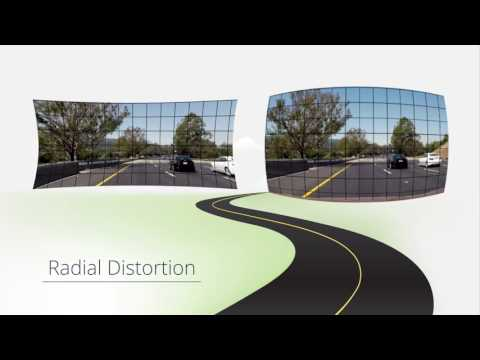

In [6]:
render_youtube_video('FBHyHUN-A8c')

#### Types of Distortion

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called radial distortion, and it’s the most common type of distortion.

Another type of distortion, is tangential distortion. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.


#### Distortion Coefficients and Correction

There are three coefficients needed to correct for **radial distortion**: **k1**, **k2**, and **k3**. To correct the appearance of radially distorted points in an image, one can use a correction formula.

In the following equations, _(x,y)_ is a point in a distorted image. To undistort these points, OpenCV calculates r, which is the known distance between a point in an undistorted (corrected) image _(x_corrected, y_corrected)_ and the center of the image distortion, which is often the center of that image _(x_c, y_c)_. This center point _(x_c, y_c)_ is sometimes referred to as the distortion center. These points are pictured below.

_Note_: The distortion coefficient **k3** is required to accurately reflect major radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, **k3** has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: _[k1, k2, p1, p2, k3]_. In this course, we will use it in all calibration calculations so that our calculations apply to a wider variety of lenses (wider, like wide angle, haha) and can correct for both minor and major radial distortion.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840ae19_screen-shot-2016-12-01-at-3.10.19-pm/screen-shot-2016-12-01-at-3.10.19-pm.png)

Points in an distorted and undistorted (corrected) image. The point _(x, y)_ is a single point in a distorted image and _(x_corrected, y_corrected)_ is where that point will appear in the undistorted (corrected) image.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58364b0d_screen-shot-2016-11-23-at-6.05.49-pm/screen-shot-2016-11-23-at-6.05.49-pm.png)
Radial distortion correction.

There are two more coefficients that account for *tangential distortion*: *p1* and *p2*, and this distortion can be corrected using a different correction formula.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58364c09_screen-shot-2016-11-23-at-6.10.06-pm/screen-shot-2016-11-23-at-6.10.06-pm.png)

Tangential distortion correction.


### 7. Quiz: Image Formation
#### QUIZ QUESTION

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5c6e36cd-5662-4599-8348-c09d7a8ed781)

###### Fun fact: the "pinhole camera" is not just a model, but was actually the earliest means of projecting images, [first documented almost 2500 years ago in China!](https://en.wikipedia.org/wiki/Camera_obscura)

###### Now back to computer vision...what is the fundamental difference between images formed with a pinhole camera and those formed using lenses?

* [ ] Images formed by a pinhole camera are always flipped upside down, lensed images appear upright.

* [ ] Pinhole camera images are black and white, while lenses form color images.

* [X] Pinhole camera images are free from distortion, but lenses tend to introduce image distortion.

* [ ] Images formed by pinhole cameras are the same as those formed using lenses.


### 8. Measuring Distortion

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/ac206923-823e-4806-9379-9db687fd22cf)

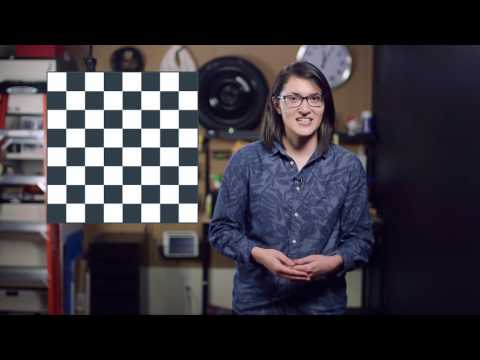

In [7]:
render_youtube_video('q3B71N6FrGw')

### 9. Finding Corners

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/bf149677-e05e-4813-a6ea-5fe76021516a)

In this exercise, you'll use the OpenCV functions `findChessboardCorners()` and `drawChessboardCorners()` to automatically find and draw corners in your image.

To learn more about both of those functions, you can watch the next video or look at the OpenCV documentation here: [cv2.findChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [cv2.drawChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners).

#### **You're going for a result like this:**

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583dcf04_corners-found3/corners-found3.jpg)

Count the number of corners in any given row and enter that value in **nx**. Similarly, count the number of corners in a given column and store that in **ny**. Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.

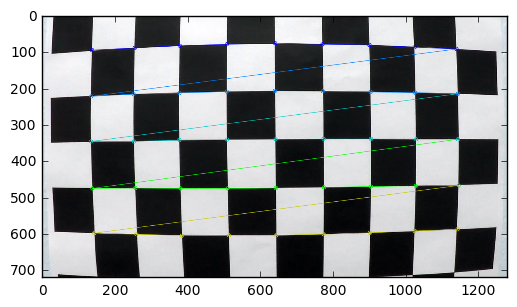

In [8]:
import numpy as np
import cv2
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 5 #TODO: enter the number of inside corners in y
objp = np.zeros((nx*ny,3), np.float32)

# Make a list of calibration images
fname = '../camera_cal/calibration1.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

### 10. Calibrating Your Camera

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a30f45cb-c1c0-482c-8e78-a26604841ec0)

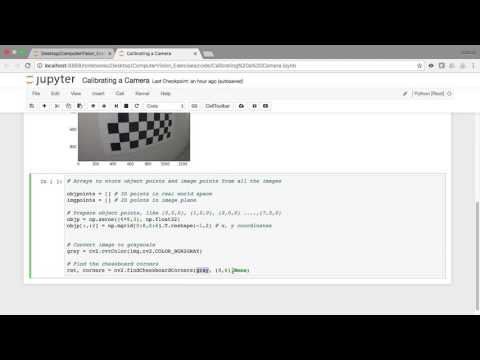

In [9]:
render_youtube_video('lA-I22LtvD4')

#### Examples of Useful Code

Converting an image, imported by cv2 or the glob API, to grayscale:

```python
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
```

_Note_: If you are reading in an image using mpimg.imread() this will read in an **RGB** image and you should convert to grayscale using _cv2.COLOR_RGB2GRAY_, but if you are using cv2.imread() or the glob API, as happens in this video example, this will read in a *BGR* image and you should convert to grayscale using _cv2.COLOR_BGR2GRAY_. We'll learn more about color conversions later on in this lesson, but please keep this in mind as you write your own code and look at code examples.

Finding the chessboard corners (for an 8x6 board):

```python
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
```

Drawing detected corners on an image:

```python
img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
```

Camera calibration, given object points, image points, and the **shape of the grayscale image**:

```python
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
```

Undistorting a test image:

```python
dst = cv2.undistort(img, mtx, dist, None, mtx)
```

### A note on image shape

The shape of the image, which is passed into the **calibrateCamera** function, is just the height and width of the image. One way to retrieve these values is by retrieving them from the **grayscale image shape** array ```gray.shape[::-1]```. This returns the image height and width in pixel values like (960, 1280).

Another way to retrieve the image shape is to get them directly from the _color_ image by retrieving the first two values in the color image shape array using ```img.shape[0:2]```. This code snippets asks for just the first two values in the shape array.

It's important to use an entire grayscale image shape _or_ the first two values of a color image shape. This is because the entire _shape_ of a color image will include a third value -- the number of color channels -- in addition to the height and width of the image. For example, the shape array of a color image might be (960, 1280, 3), which are the pixel height and width of an image (960, 1280) and a third value (3) that represents the three color channels in the color image which you'll learn more about later, and if you try to pass these three values into the calibrateCamera function, you'll get an error.

### Putting it all together

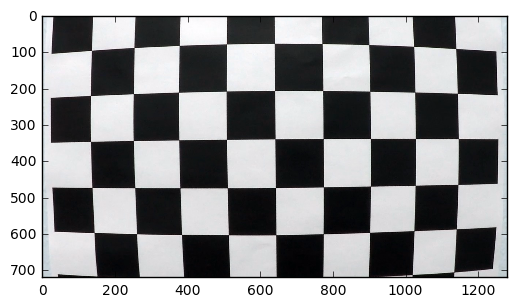

In [10]:
# prepare object points
nx = 9 #TODO: enter the number of inside corners in x
ny = 5 #TODO: enter the number of inside corners in y
objp = np.zeros((nx*ny,3), np.float32)

# Make a list of calibration images
fname = '../camera_cal/calibration1.jpg'
img = cv2.imread(fname)
plt.imshow(img)

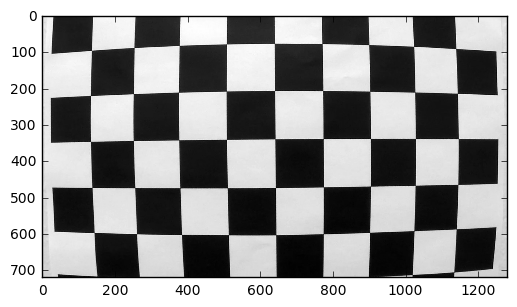

In [11]:
# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

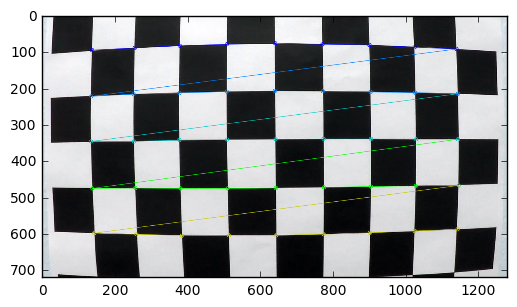

In [12]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [13]:
# If found, draw corners
if False and ret == True:
    # Camera calibration, given object points, image points, and the shape of the grayscale image
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    
    # Undistoring a test image
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(dst)

### 11. Correcting for Distortion

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5415176a-d615-49af-8535-53a385768a23)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582e25cf_orig-and-undist/orig-and-undist.png)

Here you'll get a chance to try camera calibration and distortion correction for yourself!

There are two main steps to this process: use chessboard images to identify image points and object points, and then use the OpenCV functions `cv2.calibrateCamera()` and `cv2.undistort()` to compute the calibration and undistortion.

Unfortunately, we can't perform the extraction of object points and image points in the browser quiz editor, so we provide these for you in the quiz below.

Try computing the calibration and undistortion in the exercise below, and if you want to play with extracting object points and image points yourself, go ahead and grab the IPython notebook and images in [this repository](https://github.com/udacity/CarND-Camera-Calibration).

If you run into any _errors_ as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up!

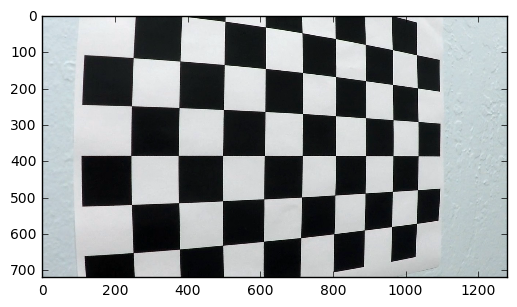

In [14]:
img = cv2.imread('../camera_cal/calibration5.jpg')
plt.imshow(img)

In [15]:
import numpy as np
import cv2
import glob
# import matplotlib.pyplot as plt
import os
# %matplotlib qt

def detect_corners(fname, nx, ny, draw_and_render=True):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        if draw_and_render == True:
            cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            write_name = '../camera_cal/corners_found/calibrated_'+str(os.path.basename(fname))+''
            cv2.imwrite(write_name, img)
            print(os.path.basename(fname)+" corners detected")
            # cv2.imshow(os.path.basename(fname), img)
            # cv2.waitKey(500)
    else:
        print("  *** Unable to detect corners for image at path {}".format(fname))
    return [ret, corners]

# base edges - doesn't work for all images in camera_cal directory
nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

def process_image(fname, nx, ny):
    ret, corners = detect_corners(fname, nx, ny)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):    
    process_image(fname, nx, ny)

# process the odd calibration images (those that don't have 9x6 edges)
odd_calibrations = [
    (9, 5, '../camera_cal/calibration1.jpg'), 
    (5, 4, '../camera_cal/calibration4.jpg'), 
    (9, 4, '../camera_cal/calibration5.jpg'),
]
#for nx, ny, fname in odd_calibrations:
#    process_image(fname, nx, ny)
#    print(fname+' processed')

cv2.destroyAllWindows()

# print(objpoints)

  *** Unable to detect corners for image at path ../camera_cal/calibration1.jpg
calibration10.jpg corners detected
calibration11.jpg corners detected
calibration12.jpg corners detected
calibration13.jpg corners detected
calibration14.jpg corners detected
calibration15.jpg corners detected
calibration16.jpg corners detected
calibration17.jpg corners detected
calibration18.jpg corners detected
calibration19.jpg corners detected
calibration2.jpg corners detected
calibration20.jpg corners detected
calibration3.jpg corners detected
  *** Unable to detect corners for image at path ../camera_cal/calibration4.jpg
  *** Unable to detect corners for image at path ../camera_cal/calibration5.jpg
calibration6.jpg corners detected
calibration7.jpg corners detected
calibration8.jpg corners detected
calibration9.jpg corners detected


(1280, 720)


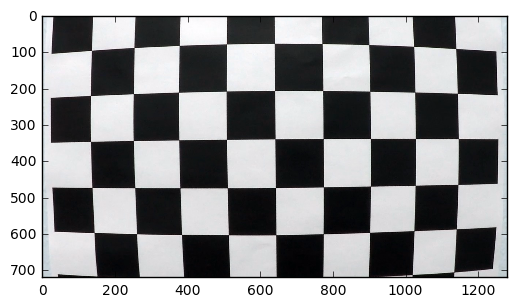

In [16]:
%matplotlib inline

# Test undistortion on an image
calibration_image = '../camera_cal/calibration1.jpg'
img = cv2.imread(calibration_image)

# extract image shape
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# This is the same thing as (img.shape[1], img.shape[0]) or img.shape[0:2][::-1]
# img_size = gray.shape[::-1]
# NOTE: tuple[::-1] reverses the order of the tuple items (e.g., (0,1)[::-1] == (1,0) )
img_size = img.shape[0:2][::-1]
print(img_size)

# plot image before undistortion
plt.imshow(img)

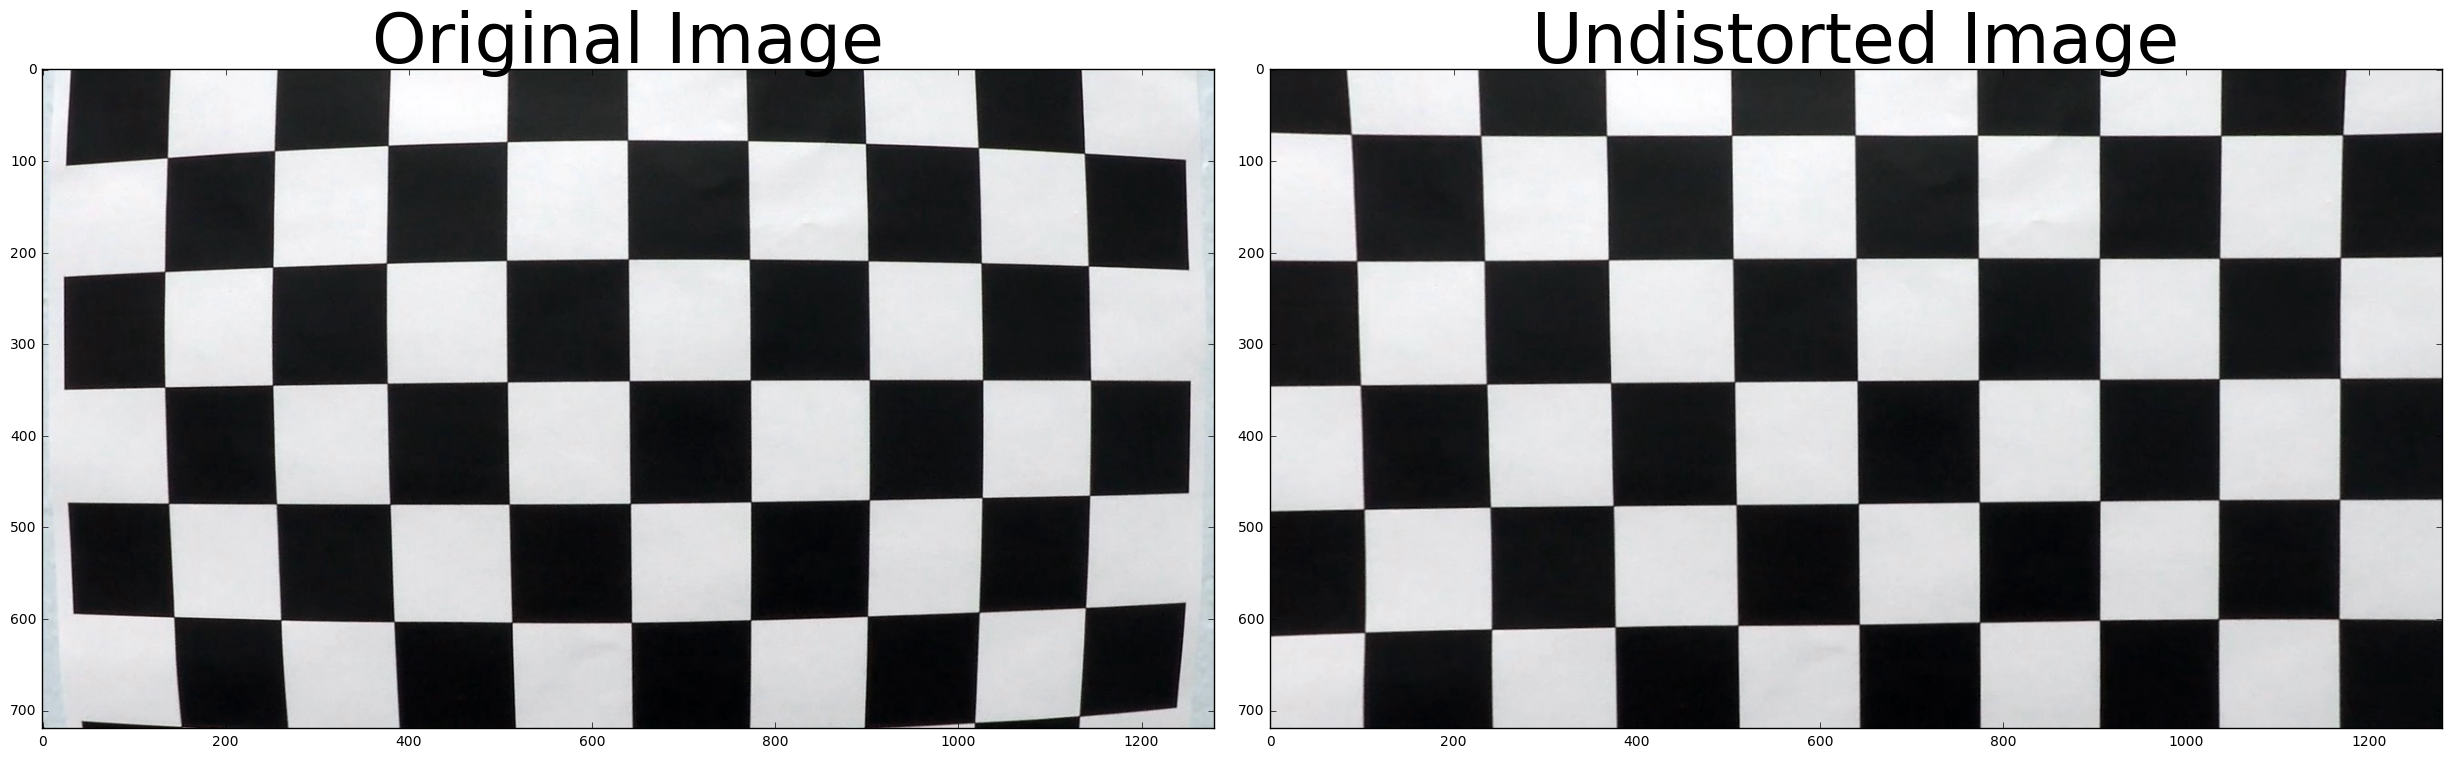

In [17]:
import pickle

# A function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera and cv2.undistort()
    # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2][::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# Do camera calibration given object points and image points
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
# dst = cv2.undistort(img, mtx, dist, None, mtx)
# print(mtx)
# print('\n\n')
# print(dist)
# dst = cal_undistort(img, objpoints, imgpoints)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2][::-1],None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('../camera_cal/undistored/'+os.path.basename(calibration_image), dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "../camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Challenge: Calibrate your own Camera!

If you're up for challenge, go ahead and try these steps on your own camera images. Just print out a [chessboard pattern](http://docs.opencv.org/2.4/_downloads/pattern.png), stick it to a flat surface, and take 20 or 30 pictures of it. Make sure to take pictures of the pattern over the entire field of view of your camera, particularly near the edges.

To extract object points and image points you can check out the IPython notebook in [this repository](https://github.com/udacity/CarND-Camera-Calibration). If you're following along with the code in the notebook, be sure you set the right size of your chessboard, the link above is to a 9 x 6 pattern, while before we were using an 8 x 6.

### 12. Lane Curvature
##### Calculating Lane Curvature

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/bf1690aa-fda6-4ead-b839-86212ebde7f2)

Self-driving cars need to be told the correct steering angle to turn, left or right. You can calculate this angle if you know a few things about the speed and dynamics of the car and how much the lane is curving.

One way to calculate the curvature of a lane line is to fit a 2nd degree polynomial to that line, and from this you can easily extract useful information.

For a lane line that is close to vertical, you can fit a line using this formula: **f(y) = Ay^2 + By + C**, where A, B, and C are coefficients.

 * **A** - gives you the curvature of the lane line

 * **B** - gives you the heading or direction that the line is pointing
 
 * **C** -  gives you the position of the line based on how far away it is from the very left of the image (y=0)

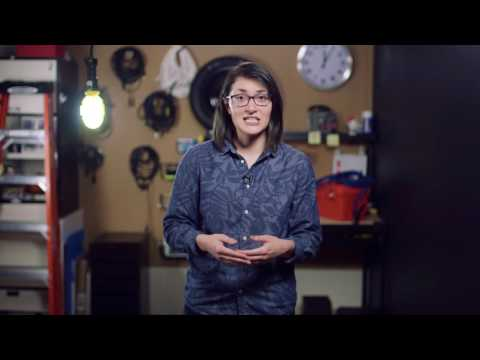

In [18]:
render_youtube_video('2UQ22uRybuU')

### 13. Perspective Transform
##### Perspective Transform

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5aba544c-13b9-440f-b35c-f67aef7e2946)

A perspective transform maps the points in a given image to different, desired, image points with a new perspective. The perspective transform you'll be most interested in is a bird's-eye view transform that lets us view a lane from above; this will be useful for calculating the lane curvature later on. Aside from creating a bird's-eye view representation of an image, a persepective transform can also be used for all kinds of different view points.


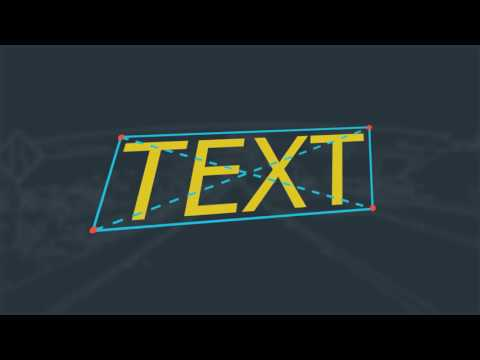

In [19]:
render_youtube_video('JTesiOANhB0')

### 14. QUIZ: Curvature and Perspective

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/69c45778-f3a1-43bf-908a-584be3b3bb45)

![](img/14_quiz_curvature_and_perspective.png)

### 15. Transform a Stop Sign

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/d33ae3ea-01aa-414e-ad20-208dc161793d)

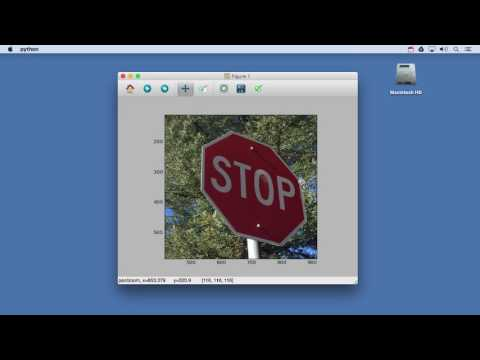

In [20]:
render_youtube_video('OXILkkXXY8A')

#### Examples of Useful Code

Compute the perspective transform, M, given source and destination points:

```python
M = cv2.getPerspectiveTransform(src, dst)
```

Compute the inverse perspective transform:

```python
Minv = cv2.getperspectiveTransform(dst, src)
```

Warp an image using the perspective transform, M:

```python
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
```

_Note_: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

### 16. Intuitions
##### QUIZ QUESTION

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/ceafc0df-0d07-4a1c-bf22-eae6137ddf26)

![](img/16_quiz_intuition.png)

### 17. Undistort and Transform Perspective

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/ae58b4d0-b909-4f4b-9332-67d80a1b4029)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582e3bec_undist-and-warp/undist-and-warp.png)

Here's a tricky quiz for you! You have now seen how to find corners, calibrate your camera, undistort an image, and apply a perspective transform. Now it's your chance to perform all these steps on an image. In the last quiz you calibrated the camera, so here I'm giving you the camera matrix, **mtx**, and the distortion coefficients **dist** to start with.

Your goal is to generate output like the image shown above. To do that, you need to write a function that takes your distorted image as input and completes the following steps:

* Undistort the image using cv2.undistort() with mtx and dist
* Convert to grayscale
* Find the chessboard corners
* Draw corners
* Define 4 source points (the outer 4 corners detected in the chessboard pattern)
* Define 4 destination points (must be listed in the same order as src points!)
* Use cv2.getPerspectiveTransform() to get M, the transform matrix
* use cv2.warpPerspective() to apply M and warp your image to a top-down view

**HINT**: Source points are the x and y pixel values of any four corners on your chessboard, you can extract these from the **corners** array output from **cv2.findChessboardCorners()**. Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.

If you run into any errors as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up! For this example, please also refer back to the examples in the _Calibrating Your Camera_ video.

In [21]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist, None, mtx)

    # return dst, None
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # 3) If corners found:
    if True:
        # a) draw corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
             #Note: you could pick any four of the detected corners
             #but 
        # My naked eye estimates
        #src = np.float32(
        #    [[1070,210],
        #     [1040,680],
        #     [440,790],
        #     [410,100]]
        #)

        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        # My naked eye estimates
#         dst = np.float32(
#             [[1100,100],
#              [1100,870],
#              [60,870],
#              [60,100]]
#         )

        img_size = (gray.shape[1], gray.shape[0])
        offset = 100

        # Actual answer coordinates
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])

        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)

        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped, M

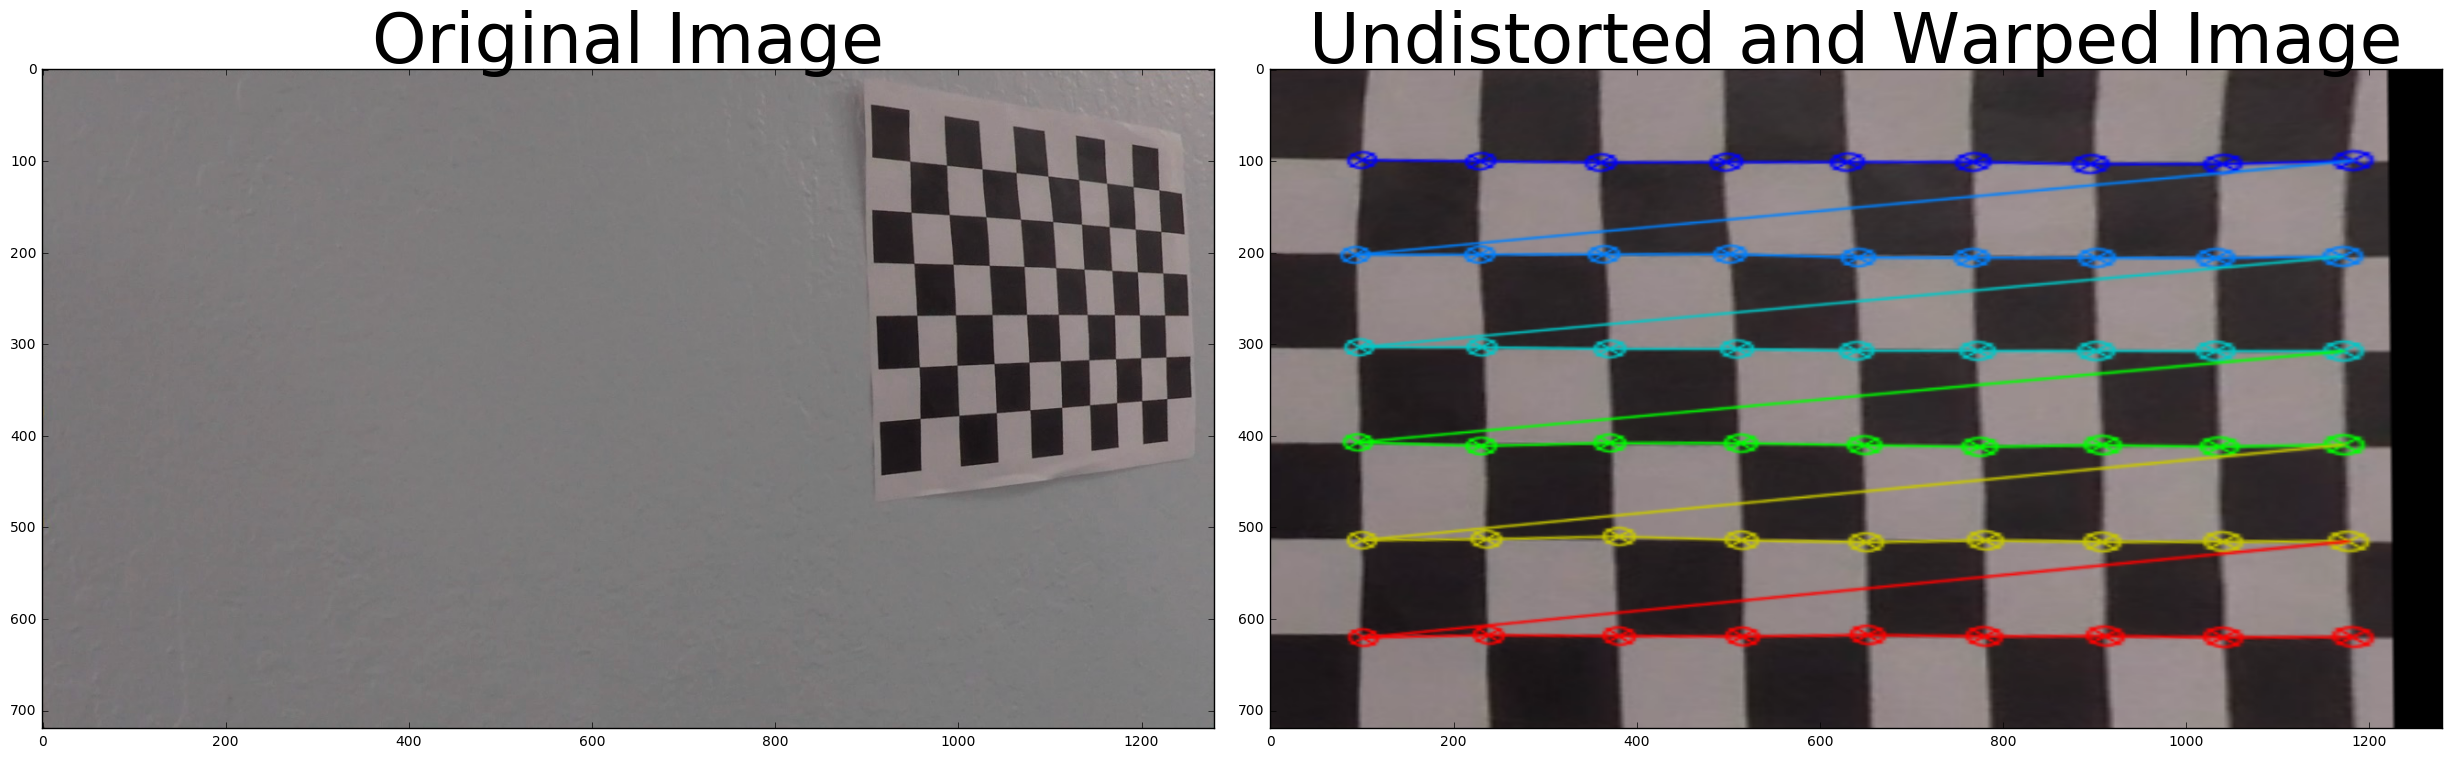

In [22]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "../camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('../camera_cal/calibration16.jpg')

nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 19. Gradient Threshold

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/68624be4-95d0-432d-be8c-637191e77509)

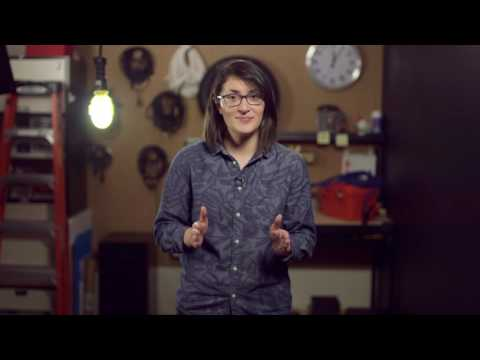

In [23]:
render_youtube_video('2TlORF3RzH8')

### 20. Sobel Operator

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/e6115672-155d-4c10-b640-fe20a4f4b0a6#)

The Solbel operator is at the heart of the Canny edge detection algorithm you used in the introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the x and y direction. The operators for _Sobel x_ and _Sobel y_, respectively, look like this:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584cbe5e_soble-operator/soble-operator.png)

These are examples of Sobel operators with a kernel size of 3 (implying 3 x 3 operator in each case). This is the minimum size, but the kernel size can be any odd number, and a larger kernel implies taking the gradient over a larger region of the image, or in other words, a smoother gradient.

To understand how these operators accomplish the task of taking a derivative, you can think of overlaying either one on a 3 x 3 region of an image. If the image is flat across that region, then the result (summing the element-wise product of the operator and corresponding image pixels) will be zero. If, instead, for example, you apply the Sx  operator to a region of the image where values are rising from left to right, then the result will be positive, implying a positive derivative.

#### If we apply the Sobel x and y operators to this image:

<!-- ![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584cc3f4_curved-lane/curved-lane.jpg) -->
![](../test_images/curved-lane.jpg)

#### And take the absolute value, we get the following result:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840c575_screen-shot-2016-12-01-at-4.50.36-pm/screen-shot-2016-12-01-at-4.50.36-pm.png)

Absolute value of Sobel x (left) and Sobel y (right).

#### x vs. y

In the above images, you can see that both the gradients taken in the x and y-direction detect the lane lines and pick up various other edges. Taking the gradient in the x-direction emphasizes edges closer to vertical and in the y-direction, edges closer to horizontal.

In the upcoming exercises, you'll write code to take various thresholds of the x and y gradients. Here's some code that might be useful going forward:

#### Examples of Useful Code

You need to pass a single color channel to the cv2.Sobel() function, so first convert to grayscale:

```python
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
```

**Note:** Make sure you use the correct grayscale conversion depending on how you've read in your images. Use cv2.COLOR_RGB2GRAY if you've read in an image using mpimg.imread() or cv2.COLOR_BGR2GRAY if you've read in an image using cv2.imread().

Calculate the derivative in the x-direction (the 1, 0 at the end denotes x-direction):

```python
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
```

Calculate the derivative in the y-direction (the 0, 1 at the end denotes y-direction):

```python
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
```

Calculate the absolute value of the x-derivative:

```python
abs_sobelx = np.absolute(sobelx)
```

Convert the absolute value image to 8-bit:

```python
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
```

**Note:** It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png. You could just as well choose a different standard range of values, like 0 to 1 etc.

Create a binary threshold to select pixels based on gradient strength:

```python
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')
```

#### And here's what that result looks like:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584cd30c_sobelx-binary/sobelx-binary.jpg)

Pixels have a value 1 or 0 based on the strength of the x-gradient.

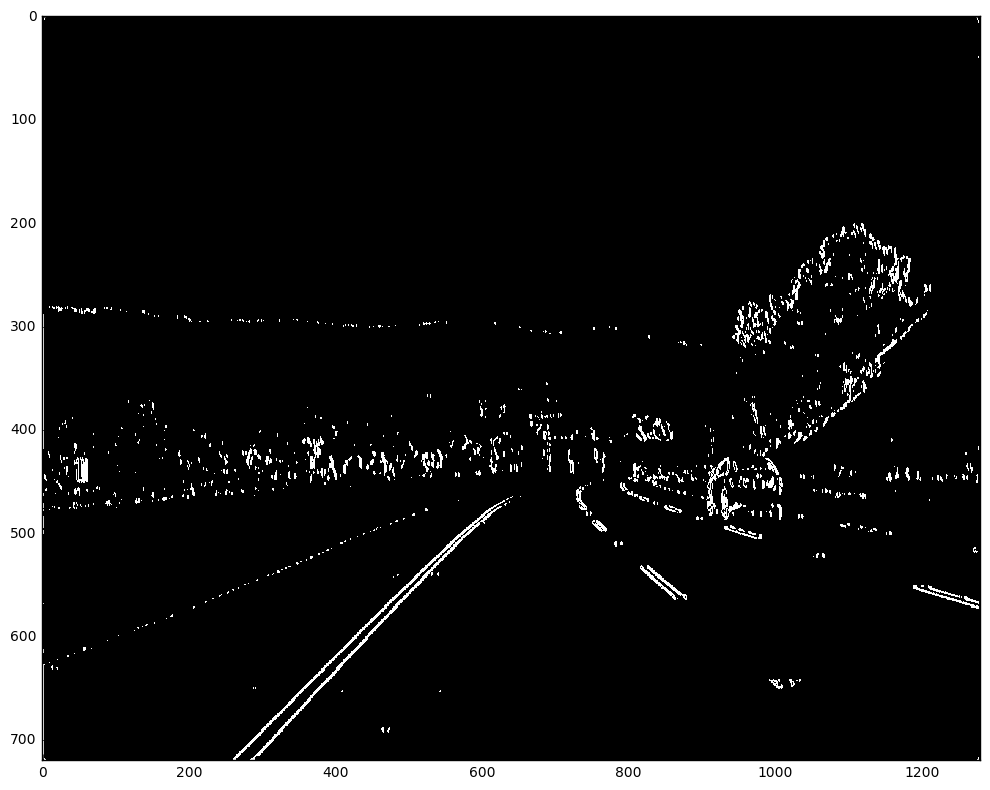

In [24]:
im = mpimg.imread('../test_images/curved-lane.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
abs_sobelx = np.absolute(sobelx)

# sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
# abs_sobely = np.absolute(sobely)

scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

def plot_image(img, cmap='gray', interpolation='none', aspect='auto'):
    fig1 = plt.figure(figsize=(10,8))
    ax = fig1.add_subplot(111)
    ax.imshow(img, cmap=cmap, interpolation=interpolation, aspect=aspect)
    plt.tight_layout()
    plt.show()

plot_image(sxbinary)

### 21. Applying Sobel

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/ac652b00-7257-4c90-8087-eda8f152a035)

Here's your chance to write a function that will be useful for the advanced lane finding project at the end of this lesson! Your goal in this exercise is to identify pixels where the gradient of an image falls within a specified threshold range.

#### Here's an example of the output you're going for in this exercise:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582f7a38_thresh-x-example/thresh-x-example.png)

Your function should be defined in the following manner:

```python
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Grayscale
    # Apply cv2.Sobel()
    # Take the absolute value of the output from cv2.Sobel()
    # Scale the result to an 8-bit range (0-255)
    # Apply lower and upper thresholds
    # Create binary_output
    return binary_output
```

You'll pass in **img** and set the parameter **orient** as 'x' or 'y' to take either the x or y gradient. You'll set **min_thresh**, and **max_thresh** to specify the range to select for binary output. You can use exclusive (**<, >**) or inclusive (**<=, >=**) thresholding.

**NOTE:** Your output should be an array of the same size as the input image of ones where gradients were in the threshold range, and zeros everywhere else.

As usual, if you run into any errors as you run your code, please refer to the **Examples of Useful Code** section in the previous video and make sure that your code syntax matches up!

#### apply_sobel.py

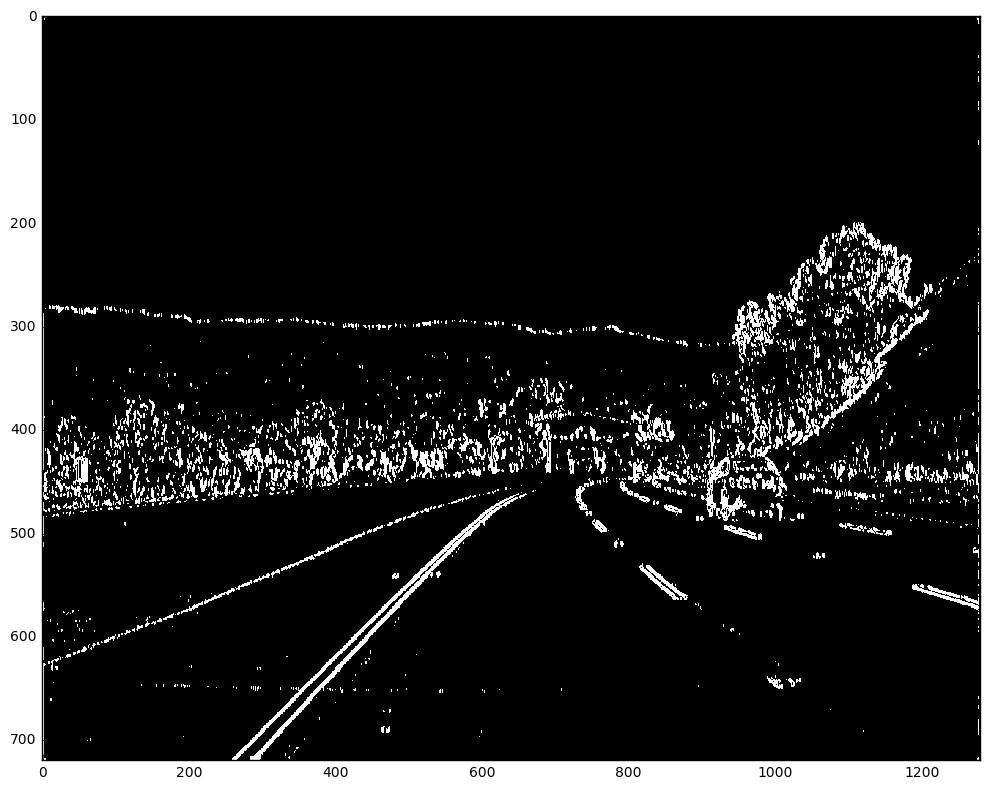

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    mode = 2
    if mode == 1: # MINE
        # Apply the following steps to img
        # 1) Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # 2) Take the derivative in x or y given orient = 'x' or 'y'
        sobelo = cv2.Sobel(gray, cv2.CV_64F, orient == 'x', orient != 'x')
        
        # 3) Take the absolute value of the derivative or gradient
        absso = np.absolute(sobelo)
        
        # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
        scale_factor = np.max(absso)/255
        scaled_sobel = (absso/scale_factor).astype(np.uint8)
        # retval, binary_output = cv2.threshold(scaled_sobel, thresh_min, thresh_max, cv2.THRESH_BINARY)
        
        binary_output = np.zeros_like(scaled_sobel)
        # Grader expects all pixels to be either a 1 or 0
        binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    else: # YOURS
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Apply x or y gradient with the OpenCV Sobel() function
        # and take the absolute value
        if orient == 'x':
            abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
        if orient == 'y':
            abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
        # Rescale back to 8 bit integer
        scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
        # Create a copy and apply the threshold
        binary_output = np.zeros_like(scaled_sobel)
        # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
        binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # Return the result
    return binary_output

# test_image = 'img/signs_vehicles_xygrad.png'
test_image = '../test_images/curved-lane.jpg'
if os.path.exists(test_image):
    # Read in an image and grayscale it
    image = mpimg.imread(test_image)
    # Run the function
    grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=10, thresh_max=100)

    # Plot the result
    if True:
        plot_image(grad_binary)
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(grad_binary, cmap='gray')
        ax2.set_title('Thresholded Gradient', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### solution.py

In [26]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

### 22. Magnitude of the Gradient

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/78be8208-1af0-4cb4-8a60-2d904b696449)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584c70ed_mag-binary/mag-binary.jpg)

With the result of the last quiz, you can now take the gradient in x or y and set thresholds to identify pixels within a certain gradient range. If you play around with the thresholds a bit, you'll find the x-gradient does a cleaner job of picking up the lane lines, but you can see the lines in the y-gradient as well.

In this next exercise, your goal is to apply a threshold to the overall magnitude of the gradient, in both x and y.

The magnitude, or absolute value of the gradient is just the square root of the squares of the individual x and y gradients; for a gradient in both the x and y directions, the magnitude is the square root of the sum of the squares. See the equations below.

![](img/22_sobel_magnitude.png)

It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter (must be an odd number!)

The function you'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met.

#### Steps to take in this exercise:

1. Fill out the function in the editor below to return a thresholded gradient magnitude. Again, you can apply exclusive (**<, >**) or inclusive (**<=, >=**) thresholds.

2. Test that your function returns output similar to the example below for **sobel_kernel=9**, **mag_thresh=(30, 100)**.

#### Here's an example of the output you're going for:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583dc062_thresh-mag-example/thresh-mag-example.png)

#### mag_thresh.py

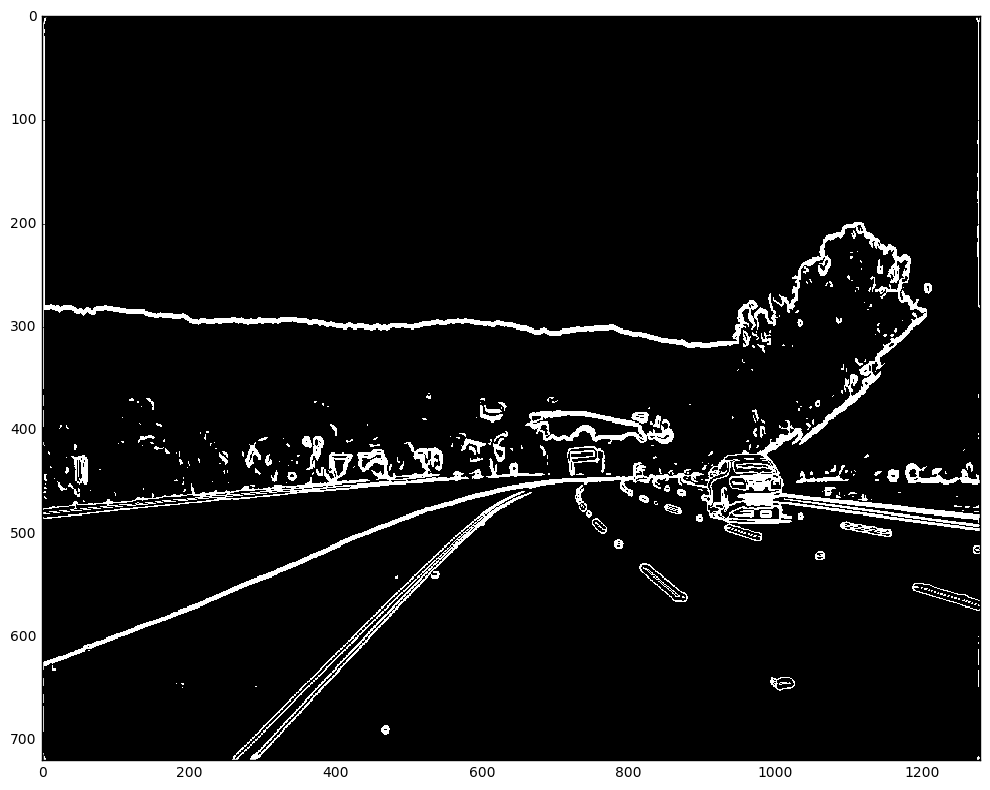

In [27]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    gradmag = (255*gradmag/np.max(gradmag)).astype(np.uint8) 
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    return mag_binary

if os.path.exists(test_image):
    # Read in an image
    image = mpimg.imread(test_image)
    # Run the function
    mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
    
    if True:
        plot_image(mag_binary)
    else:
        # Plot the result
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(mag_binary, cmap='gray')
        ax2.set_title('Thresholded Magnitude', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### solution.py

In [28]:
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output


### 23. Direction of the Gradient

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/d9ad4008-6744-4dc1-803d-e43a67cc050f)

When you play around with the thresholding for the gradient magnitude in the previous exercise, you find what you might expect, namely, that it picks up the lane lines well, but with a lot of other stuff detected too. Gradient magnitude is at the heart of Canny edge detection, and is why Canny works well for picking up all edges, but in the case of lane lines, we're interested only in edges of a particular orientation. So now we will explore the direction, or orientation, of the gradient.

The direction of the gradient is simply the arctangent of the y-gradient divided by the x-gradient. 

_(tan^−1) * (sobel_y/sobel_x)_

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of _-pi/2_ to _pi/2_. An orientation of 0 implies a horizontal line and orientations of _+/- pi/2_ imply vertical lines.

In this next exercise, you'll write a function to compute the direction of the gradient and apply a threshold. The direction of the gradient is much noisier than the gradient magnitude, but you should find that you can pick out particular features by orientation.

#### Steps to take in this exercise:

1. Fill out the function in the editor below to return a thresholded absolute value of the gradient direction. Use Boolean operators, again with exclusive (**<, >**) or inclusive (**<=, >=**) thresholds.

2. Test that your function returns output similar to the example below for **sobel_kernel=15**, **thresh=(0.7, 1.2)**.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583dc504_thresh-grad-dir-example/thresh-grad-dir-example.jpg)

#### dir_thresh.py

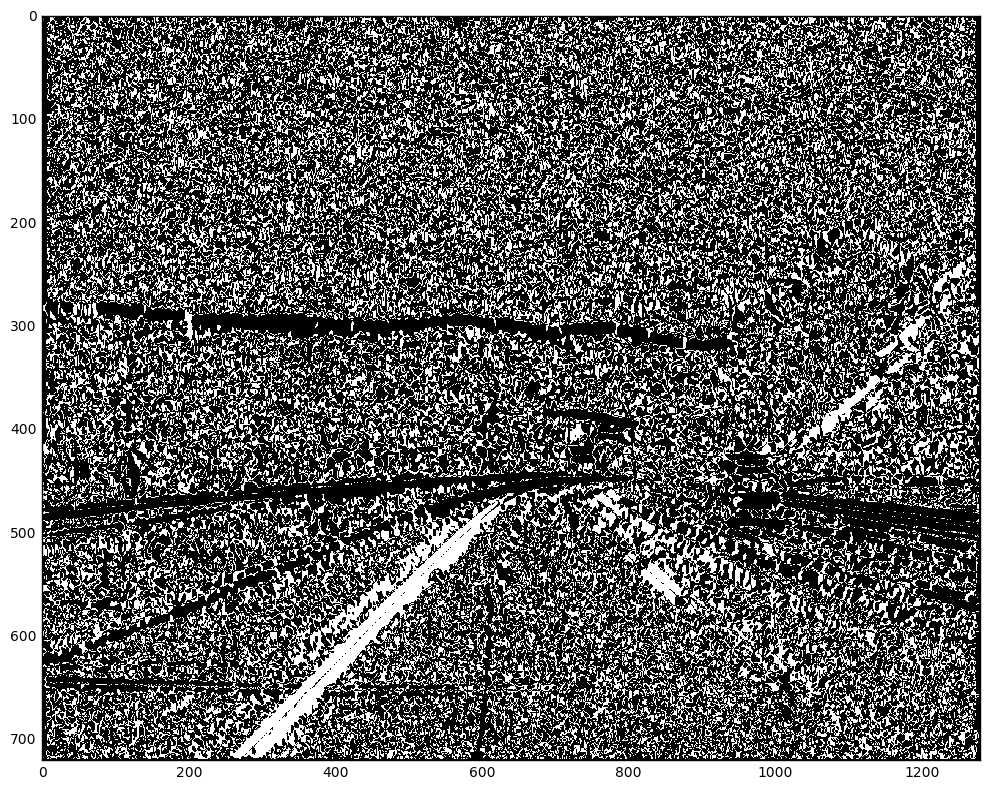

In [29]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Here I'm suppressing annoying error messages
    with np.errstate(divide='ignore', invalid='ignore'):
        absgraddir = np.absolute(np.arctan(sobely/sobelx))
        dir_binary =  np.zeros_like(absgraddir)
        dir_binary[(absgraddir > thresh[0]) & (absgraddir < thresh[1])] = 1

    return dir_binary

if os.path.exists(test_image):
    # Read in an image
    image = mpimg.imread(test_image)

    # Run the function
    dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.2))
    
    if True:
        plot_image(dir_binary)
    else:
        # Plot the result
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(image)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(dir_binary, cmap='gray')
        ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### solution.py

In [30]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

### 24. Combining Thresholds

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/c53a9a18-d31b-4fd7-bc44-07070507abd8)

If you play around with the thresholds in the last exercise, you'll find that you can start to identify the lane lines by gradient direction alone by setting the threshold around **thresh = (0.7, 1.3)**, but there's still a lot of noise in the resulting image.

Now consider how you can use various aspects of your gradient measurements (x, y, magnitude, direction) to isolate lane-line pixels. Specifically, think about how you can use thresholds of the x and y gradients, the overall gradient magnitude, and the gradient direction to focus on pixels that are likely to be part of the lane lines.

#### Challenge:

In the project at the end of this section, you'll want to experiment with thresholding various aspects of the gradient, so now would be a great time to start coding it up on your local machine! Grab the image we've been working with for the last three quizzes [here](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.png).

![](https://s3.amazonaws.com/udacity-sdc/advanced_lane_finding/signs_vehicles_xygrad.png)

Combine the selection thresholds from the last 3 quizzes to write a piece of code like the following, where you can play with various thresholds and see the output.

```python
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(0, 255))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(0, 255))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, np.pi/2))
```

Try different combinations and see what you get. For example, here is a selection for pixels where both the x and y gradients meet the threshold criteria, or the gradient magnitude and direction are both within their threshold values.

```python
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
```

#### Here is an example of a binary result from multiple thresholds.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583b72df_binary-combo-example/binary-combo-example.jpg)

In [31]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(gray, cv2.CV_64F, orient=='x', orient!='x')
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(img, sobel_kernel=3, thresh=(0, 255)):
    # Calculate gradient magnitude
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    gradmag = (255*gradmag/np.max(gradmag)).astype(np.uint8) 
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= thresh[0]) & (gradmag <= thresh[1])] = 1
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Here I'm suppressing annoying error messages
    with np.errstate(divide='ignore', invalid='ignore'):
        absgraddir = np.absolute(np.arctan(sobely/sobelx))
        dir_binary =  np.zeros_like(absgraddir)
        dir_binary[(absgraddir > thresh[0]) & (absgraddir < thresh[1])] = 1
    return dir_binary

# Read in an image
image = mpimg.imread(test_image)

# Choose a Sobel kernel size
ksize = 15 # Choose a larger odd number to smooth gradient measurements

### Apply each of the thresholding functions

#### gradx

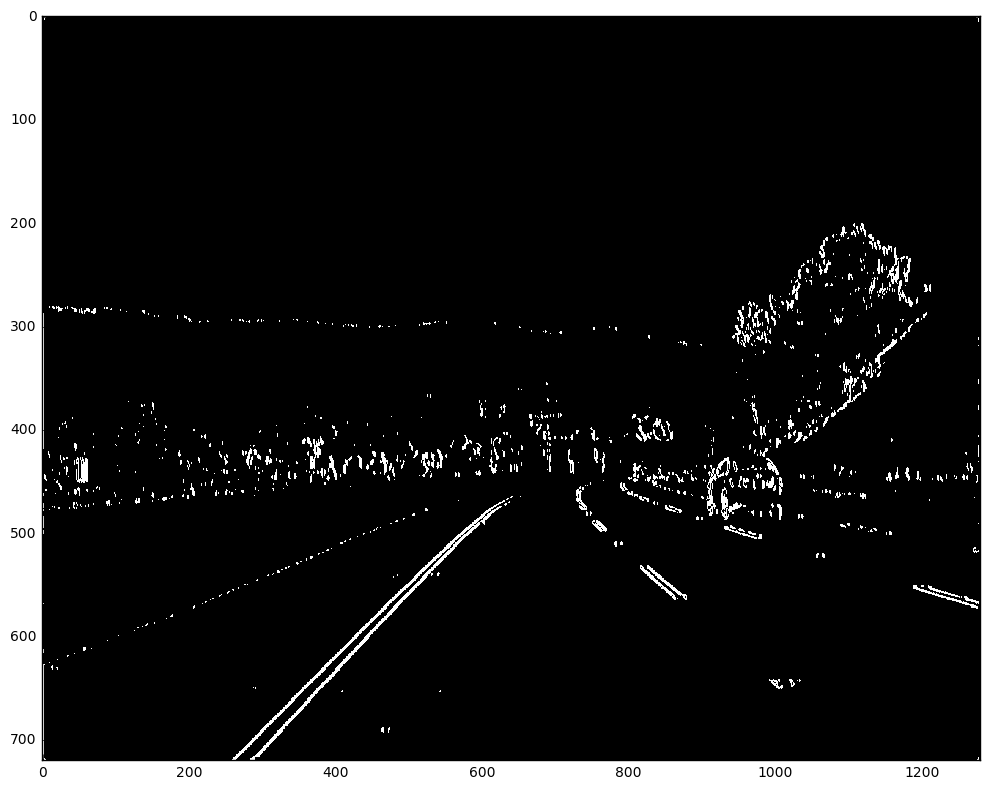

In [32]:
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))

if True:
    plot_image(gradx)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(gradx, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### grady

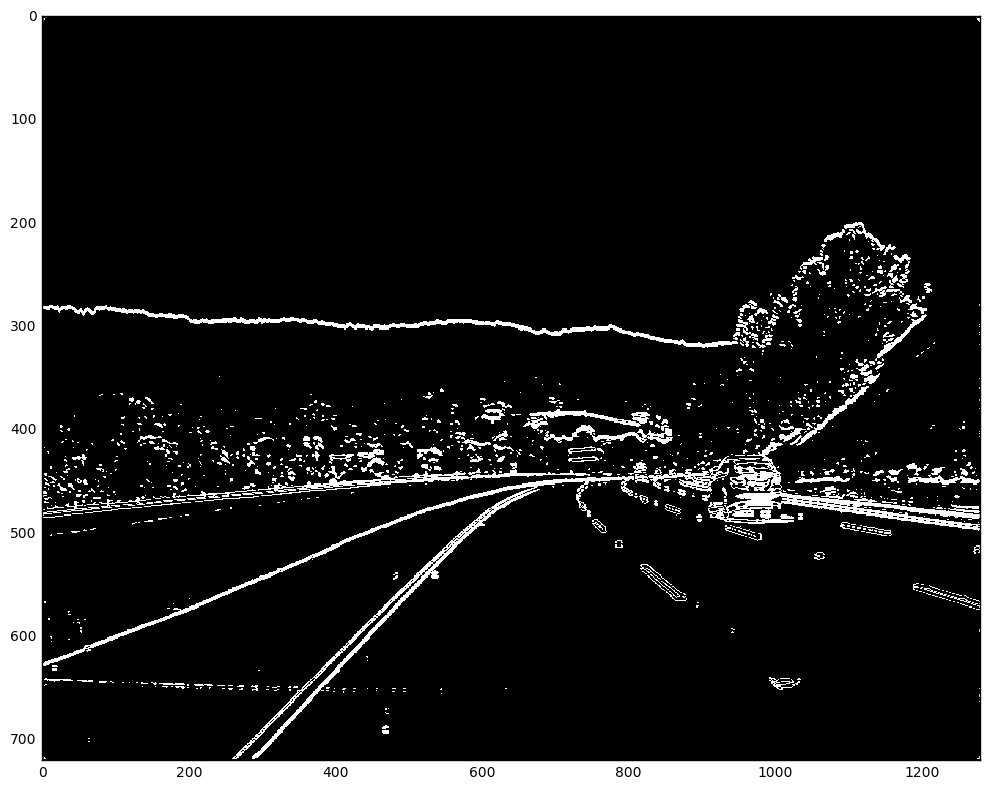

In [33]:
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))

if True:
    plot_image(grady)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(grady, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### combined (gradx&grady)

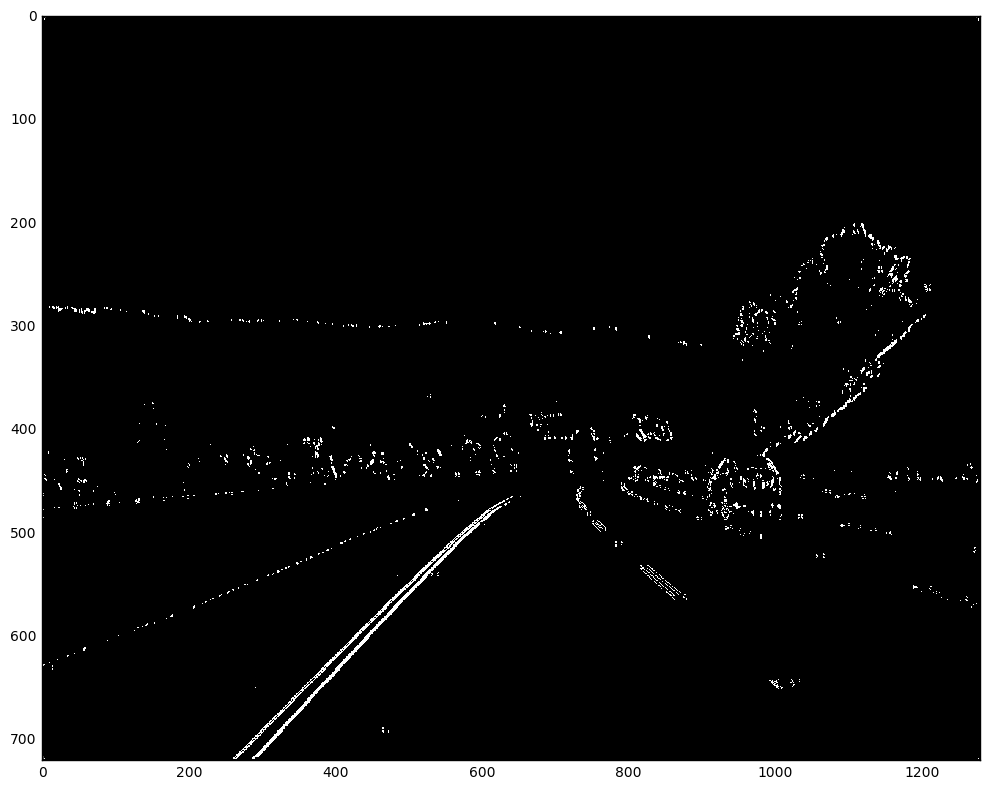

In [34]:
combined = np.zeros_like(gradx)
combined[(gradx == 1) & (grady == 1)] = 1

if True:
    plot_image(combined)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(combined, cmap='gray')
    ax2.set_title('Thresholded Grad x&y', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### mag_binary

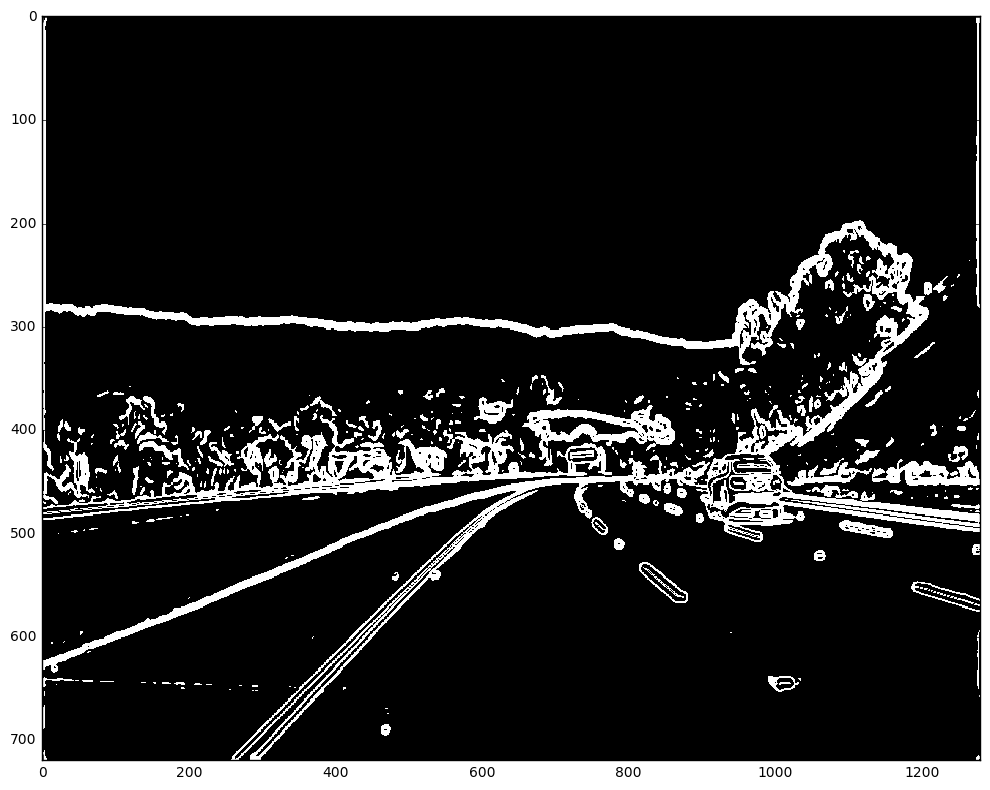

In [35]:
mag_binary = mag_thresh(image, sobel_kernel=ksize, thresh=(20, 100))

if True:
    plot_image(mag_binary)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(mag_binary, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### dir_binary

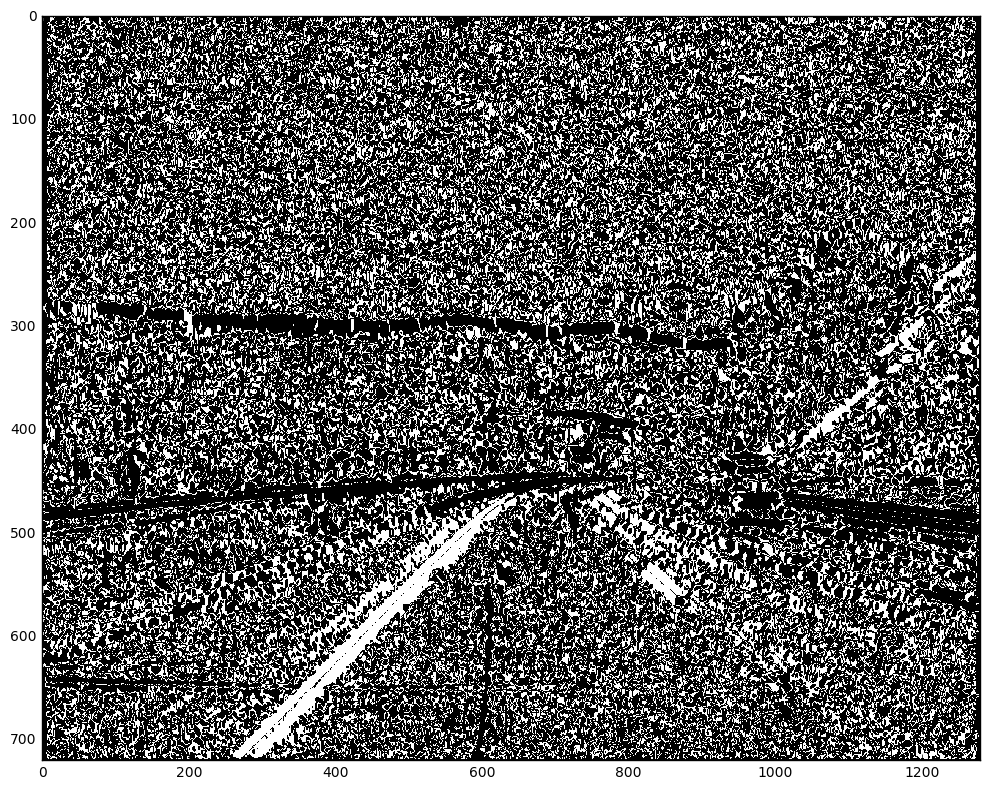

In [36]:
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.8, 1.25))

if True:
    plot_image(dir_binary)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(dir_binary, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### combined (dir_binary&mag_binary)

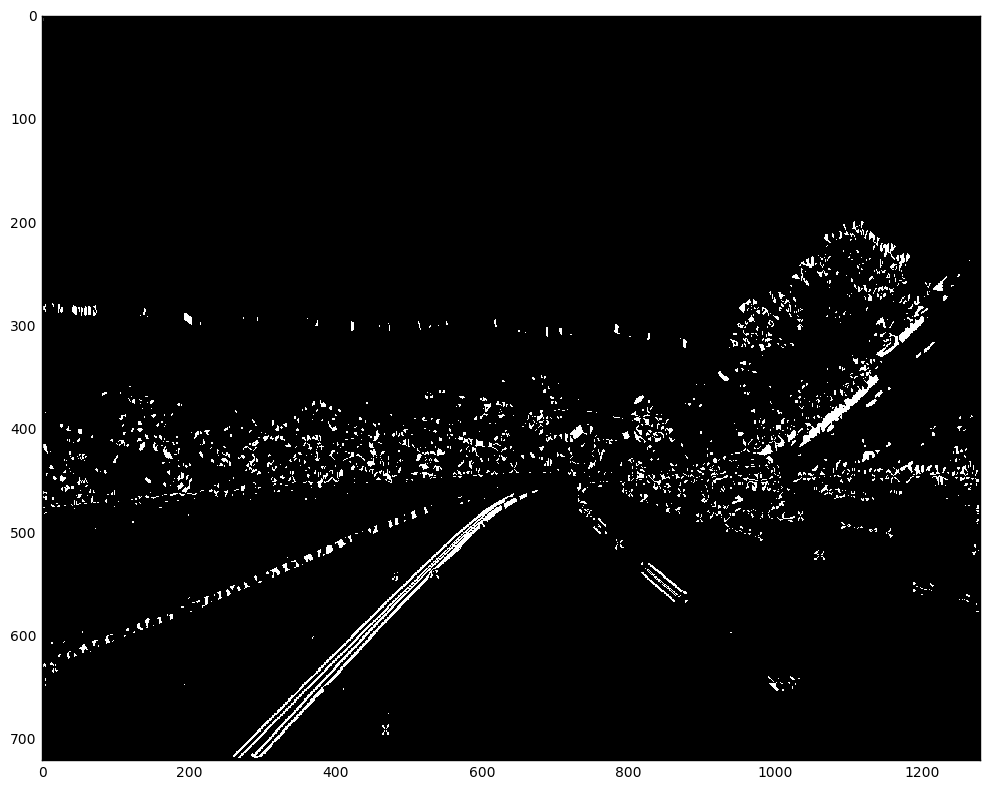

In [37]:
combined = np.zeros_like(dir_binary)
combined[(dir_binary == 1) & (mag_binary == 1)] = 1

if True:
    plot_image(combined)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(combined, cmap='gray')
    ax2.set_title('Thresholded Grad Dir&Mag', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### combined

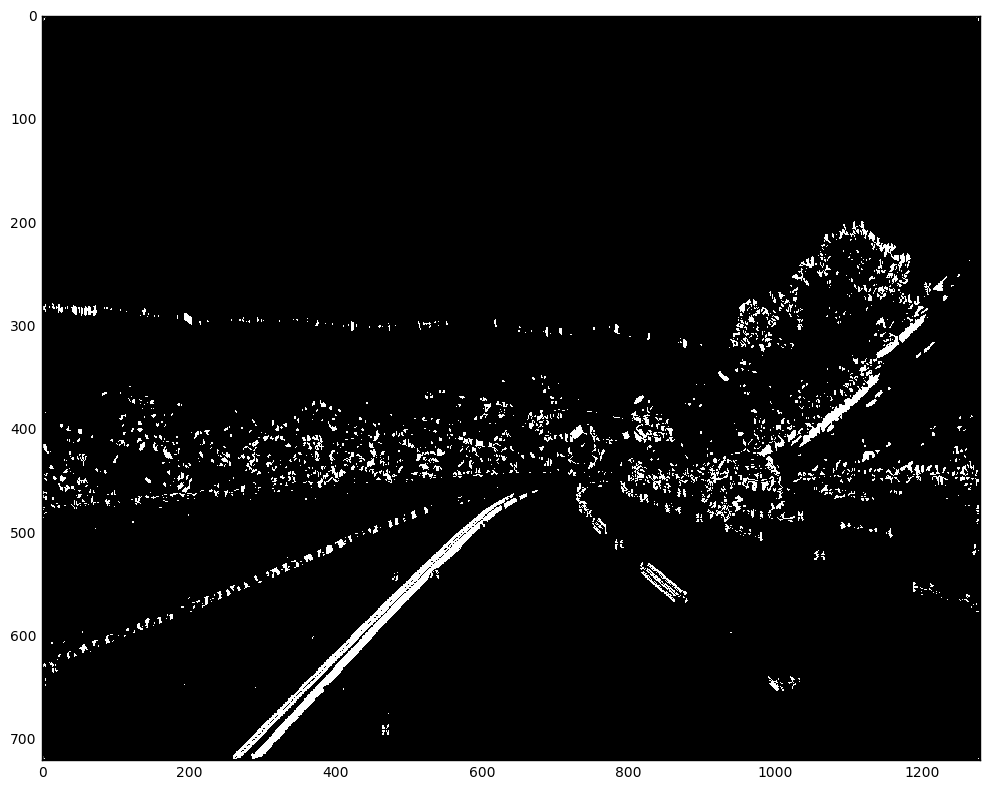

In [38]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

if True:
    plot_image(combined)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(combined, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 25. Color Spaces

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/3272fb94-57c6-4705-bc81-c53bbb336ae5)

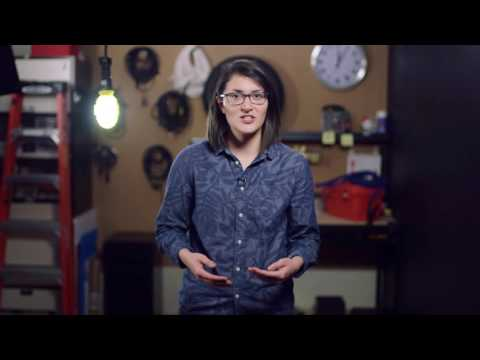

In [39]:
render_youtube_video('mhILAhzgPRE')

### 26. Color Thresholding

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/c8f43048-e923-4b95-ad1c-ec74db948cb1)

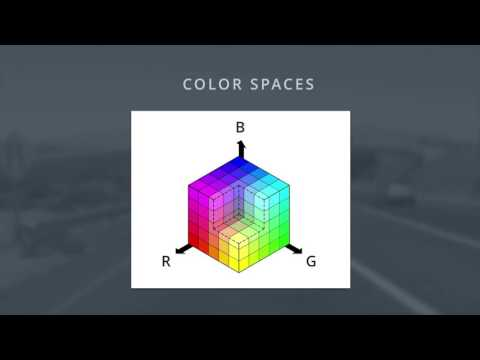

In [40]:
render_youtube_video('dMI_so4P1Jc')

A **color space** is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

**RGB** is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

**Note**: If you read in an image using **[matplotlib.image.imread()](http://matplotlib.org/api/image_api.html#matplotlib.image.imread)** ([matplotlib image tutorial](http://matplotlib.org/users/image_tutorial.html)) you will get an RGB image, but if you read it in using OpenCV **[cv2.imread()](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html#imread)** ([openCV image tutorial](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html)) this will give you a BGR image.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5834e496_screen-shot-2016-11-22-at-4.35.48-pm/screen-shot-2016-11-22-at-4.35.48-pm.png)

RGB color space

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.

There is also **HSV** color space (hue, saturation, and value), and **HLS** space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis.

To get some intuition about these color spaces, you can generally think of **Hue** as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, **Lightness** and **Value** represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. **Saturation** also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the history and the derivation of HLS and HSV color spaces [here](https://en.wikipedia.org/wiki/HSL_and_HSV).

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5834e6ed_screen-shot-2016-11-22-at-4.44.32-pm/screen-shot-2016-11-22-at-4.44.32-pm.png)

(Left) HSV color space, (Right) HLS color space

In the code example, I used HLS space to help detect lane lines of different colors and under different lighting conditions.

OpenCV provides a function **hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)** that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that all this math is for converting 8-bit images, which is the format for most road images in this course. These equations convert one color at a time from RGB to HLS.

#### Constants

![](img/26_constants.png)

These are the maximum and minimum values across all three RGB values for a given color.

#### H channel conversion equations

There are three different equations, which one is used depends on the the value of _Vmax_  whether that's R, G, or B.

![](img/26_H_channel_conversion_equations.png)

**Note:** In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

#### L channel conversion equation

![](img/26_L_channel_conversion_equation.png)

#### S channel conversion equations

There are two possible equations; one is used depending on the value of L.

![](img/26_S_channel_conversion_equations.png)

### 27. HLS Intuitions

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/5ad61f44-73a9-44ac-9a8c-37b41770df0a)

#### Quiz 1

![](img/27_hls_intuition_quiz1.png)

##### Answer Feedback

> Correct! L stands for Lightness and it's a measure of how light or dark a color is. Of these three colors, all of them have the same value for hue and saturation, but the darkest color (option A) has the lowest value for lightness, and the lightest option (option C) has the highest value for lightness.


#### Quiz 2

![](img/27_hls_intuition_quiz2.png)

##### Answer Feedback

> That's right! They are all bluish, so will have very similar Hue (H-channel) values.

### 28. HLS and Color Thresholds

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/d7542ed8-36ce-4407-bd0a-4a38d17d2325)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58531b46_test6/test6.jpg)

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:

```python
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
```

And here's the result:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58531db9_test6gray/test6gray.jpg)

You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:

```python
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
```

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58531f5e_test6rgb/test6rgb.jpg)

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:

```python
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
```

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/585322d2_test6r-channel/test6r-channel.jpg)

In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

```python
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
```

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532d15_test6hls/test6hls.jpg)

The S channel picks up the lines well, so let's try applying a threshold there:

```python
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
```

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532d3b_test6s-channel/test6s-channel.jpg)

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

```python
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1
```

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532e18_test6h-channel/test6h-channel.jpg)

From these examples, you can see that the S channel is probably your best bet, given that it's cleaner than the H result and doing a bit better than the R channel or simple grayscaling. But, it's not abundantly clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement. Let's now look at the same thresholds applied to each of these four channels for this image:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532f15_test4/test4.jpg)

Here's how the various channels and binaries (with the same threshold values as above) look:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532f41_test4gray/test4gray.jpg)
![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532f53_test4r-channel/test4r-channel.jpg)
![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532f69_test4s-channel/test4s-channel.jpg)
![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58532f86_test4h-channel/test4h-channel.jpg)

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

### 29. HLS Quiz

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/e1f444b5-f649-44a1-9a69-39873e8c04d5)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584c86e6_hls-binary/hls-binary.jpg)

In this exercise, you can try applying a color threshold in the HLS color space. If you have any problems with the implementation, please refer to the previous video and instructor notes.

Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive (**>**) lower bound and an inclusive upper bound (**<=**).

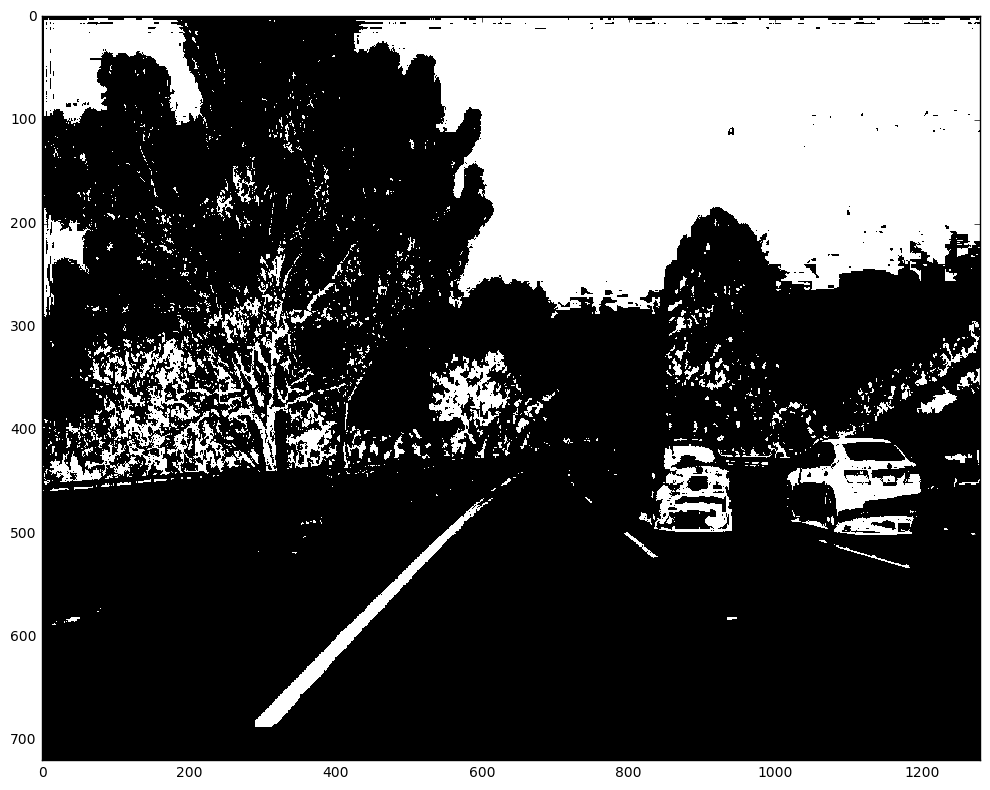

In [41]:
# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('../test_images/test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255), hls_channel=2):
    """
    Takes in an RGB/BGR image and threshold values and returns a binary output from applying 
    the threshold to the S-channel.
    
    Thresholds are applied by using an exclusive (>) lower bound and an inclusive upper bound (<=).
    """
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # 2) Apply a threshold to the S channel
    H,L,S = hls[:,:,0], hls[:,:,1], hls[:,:,2]
    HLS = [H,L,S]
    C = HLS[hls_channel]
    binary = np.zeros_like(C)
    binary[(C > thresh[0]) & (C <= thresh[1])] = 1
    
    # 3) Return a binary image of threshold result
    return binary
    
hls_binary = hls_select(image, thresh=(100, 255), hls_channel=2)

if True:
    plot_image(hls_binary)
else:
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(hls_binary, cmap='gray')
    ax2.set_title('Thresholded S', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 30. Color and Gradient

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/a1b70df9-638b-46bb-8af0-12c43dcfd0b4)

Now it's time to combine what you know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584763e9_screen-shot-2016-12-06-at-5.19.16-pm/screen-shot-2016-12-06-at-5.19.16-pm.png)

Combined color and gradient thresholds for lane detection.

At this point, it's okay to detect edges around trees or cars because these lines can be mostly filtered out by applying a mask to the image and essentially cropping out the area outside of the lane lines. It's most important that you reliably detect different colors of lane lines under varying degrees of daylight and shadow.

You can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. You can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

Here's what that looks like in code:

```python
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
```

The output is shown below. The final image **color_binary** is a combination of binary thresholding the S channel (HLS) and binary thresholding the result of applying the Sobel operator in the x direction on the original image.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58476598_screen-shot-2016-12-06-at-5.27.35-pm/screen-shot-2016-12-06-at-5.27.35-pm.png)

(Left) Stacked image; the green is the gradient threshold component and the blue is the color channel threshold component. (Right) black and white combined thresholded image - this one has combined both gradient and color thresholds into one image.

In this next exercise, you'll get the chance to play around with different combinations of color and gradient with the goal using the pipeline you come up with for your upcoming project. There's no correct submission, just explore!

Some interesting things to explore might include: the H channel, different threshold values for color and gradient binary images, and even a different color space, like HSV!

In [42]:
def pipeline(img, sobel_kernel=3, sobel_thresh=(10, 150), color_thresh=(220, 255)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hls[:,:,2]

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    v_channel = hsv[:,:,2]

    # Sobel x
    sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=sobel_kernel) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 20
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    # color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    # color_binary = np.stack(( np.zeros_like(sxbinary), sxbinary, s_binary), axis=-1)
        
    # Threshold x-gradient and V channel for lane pixel selection
    retval, c_sxbinary = cv2.threshold(scaled_sobel, sobel_thresh[0], sobel_thresh[1], cv2.THRESH_BINARY)
    retval, c_s_binary = cv2.threshold(s_channel.astype('uint8'), color_thresh[0], color_thresh[1], cv2.THRESH_BINARY)
    color_binary = np.stack(( np.zeros_like(c_sxbinary), c_sxbinary, c_s_binary), axis=-1)

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

    return [color_binary, combined_binary]
    
image = mpimg.imread('../test_images/test5.jpg')
color_binary, combined_binary = pipeline(image, sobel_kernel=3, sobel_thresh=(10, 150), color_thresh=(220, 255))

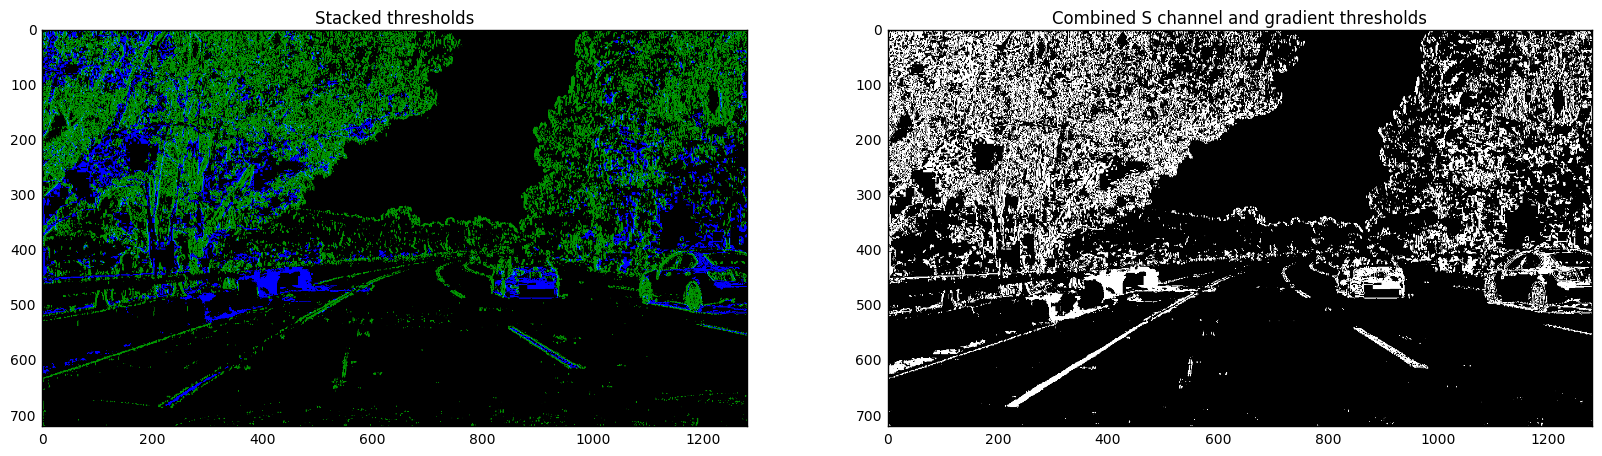

In [43]:
# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

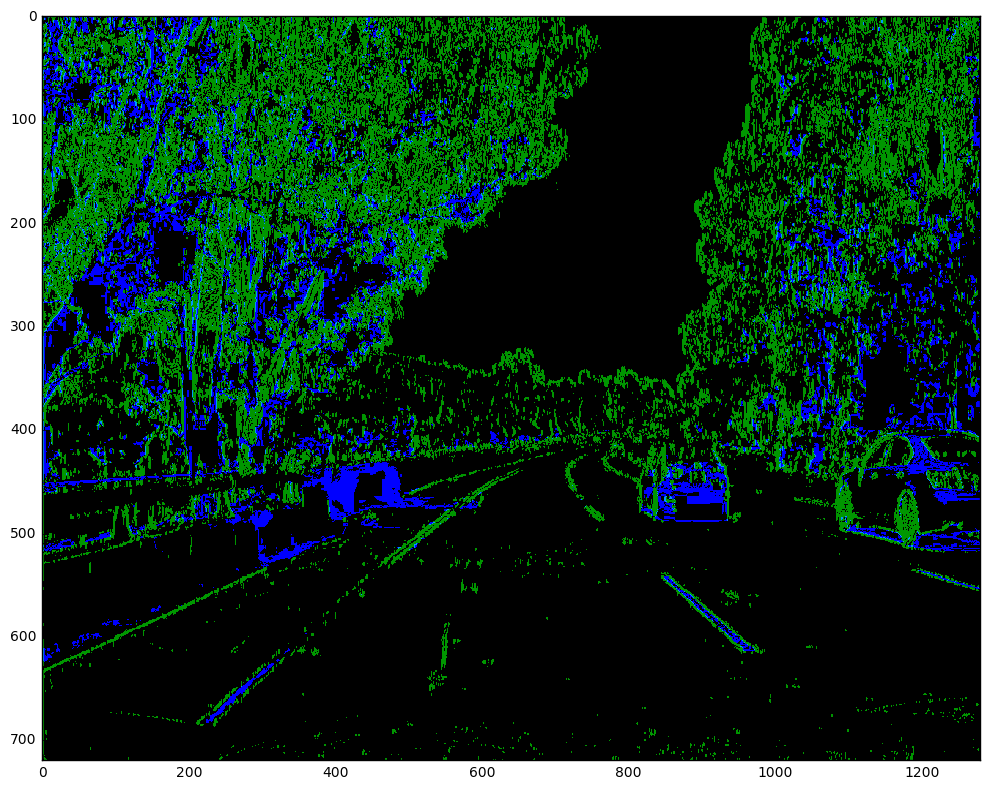

In [44]:
plot_image(color_binary)

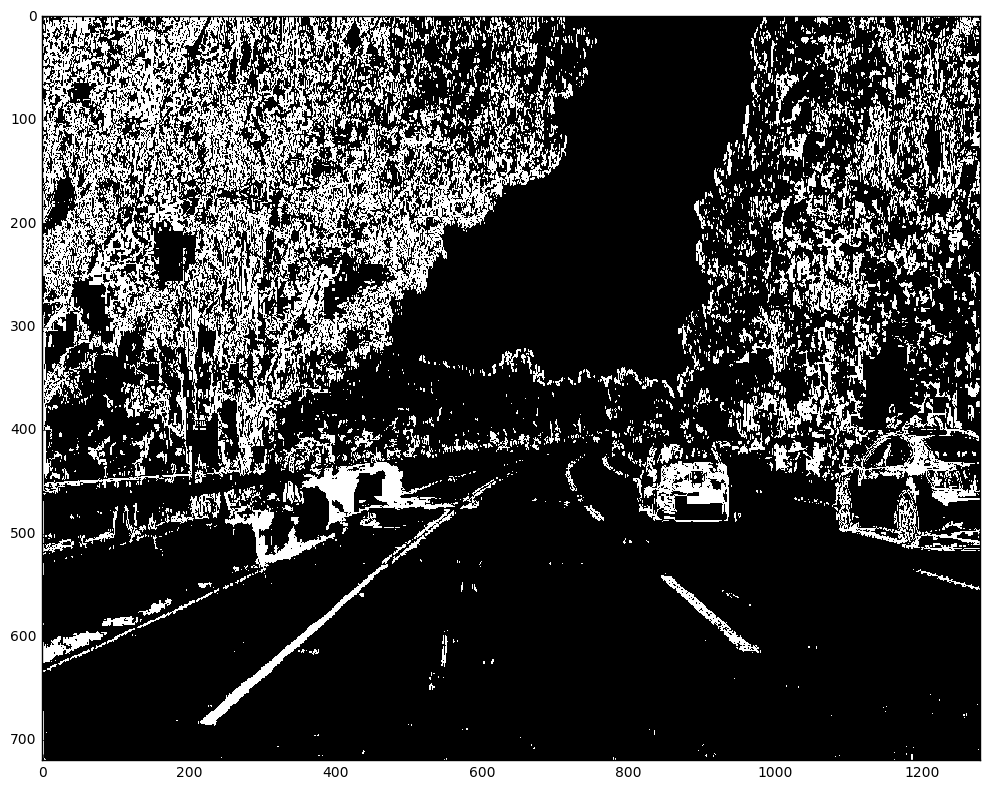

In [45]:
plot_image(combined_binary)

### Pipeline Exploration

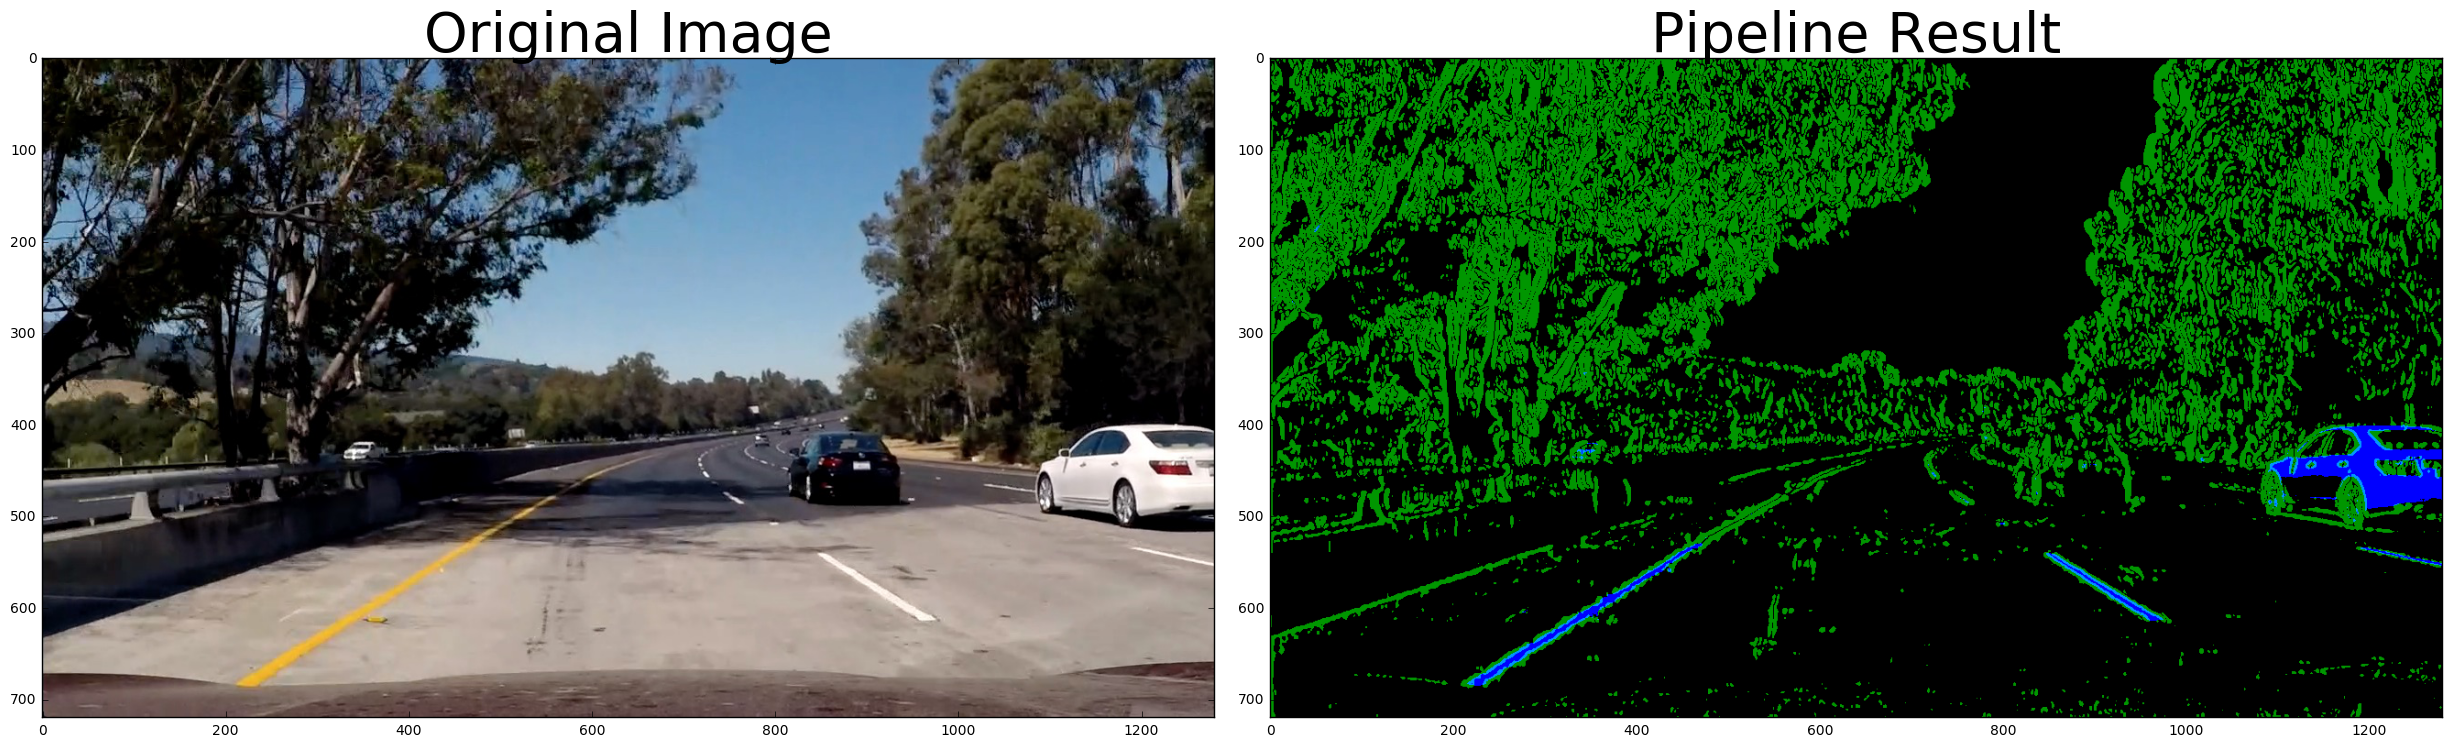

In [46]:
# Edit this function to create your own pipeline.
def pipeline2(img, sobel_kernel=3, sobel_thresh=(10, 150), color_thresh=(220, 255)):
    img = np.copy(img)
    
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    v_channel = hsv[:,:,2]
    
    # Take the absolute value of the derivative of the V channel in the x direction
    sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=sobel_kernel) 
    abssx = np.absolute(sobelx) 
    
    # Scale the derivative back to 8 bit
    scale_factor = np.max(abssx)/255
    abssx = (abssx/scale_factor).astype(np.uint8)
    
    # Threshold x-gradient and V channel for lane pixel selection
    retval, sxbinary = cv2.threshold(abssx, sobel_thresh[0], sobel_thresh[1], cv2.THRESH_BINARY)
    retval, vbinary = cv2.threshold(v_channel.astype('uint8'), color_thresh[0], color_thresh[1], cv2.THRESH_BINARY)
    
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, vbinary))
    return color_binary

image = mpimg.imread('../test_images/test5.jpg')
result = pipeline2(image, sobel_kernel=9, sobel_thresh=(10, 150), color_thresh=(220, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

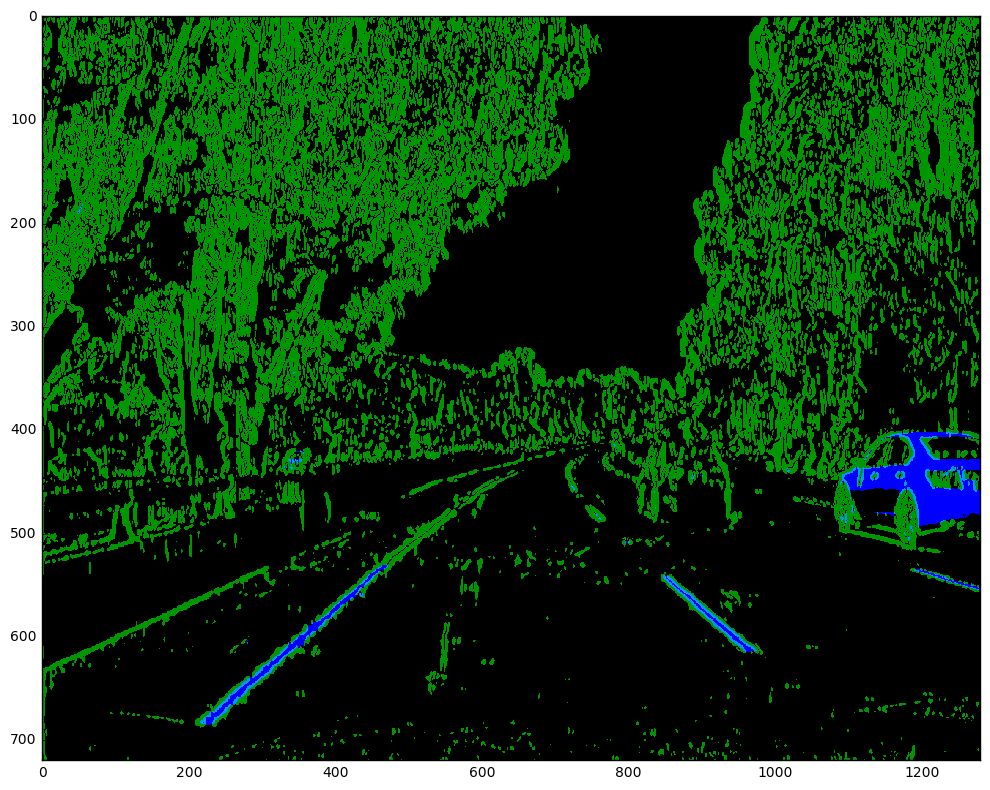

In [47]:
plot_image(result)

### 31. Reviewing Steps

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/44732d48-dcfe-4b4e-9614-12422ec29306)

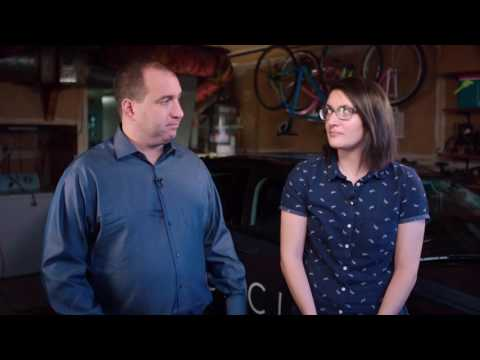

In [48]:
render_youtube_video('0lyUMJdg-PY')

#### Project Steps

Steps we’ve covered so far:

1. Camera calibration
2. Distortion correction
3. Color/gradient threshold
4. Perspective transform

After doing these steps, you’ll be given two additional steps for the project:

1. Detect lane lines
2. Determine the lane curvature

### 32. Processing each Image

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/e6e02d4d-7c80-4bed-a79f-869ef496831b)

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58421f5b_color-shadow-example/color-shadow-example.jpg)

In the project at the end of this module, the first thing you'll do is to compute the camera calibration matrix and distortion coefficients. You only need to compute these once, and then you'll apply them to undistort each new frame. Next, you'll apply thresholds to create a binary image and then apply a perspective transform.

#### Thresholding

You'll want to try out various combinations of color and gradient thresholds to generate a binary image where the lane lines are clearly visible. There's more than one way to achieve a good result, but for example, given the image above, the output you're going for should look something like this:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58421f8f_binary-combo-img/binary-combo-img.jpg)

#### Perspective Transform

Next, you want to identify four source points for your perspective transform. In this case, you can assume the road is a flat plane. This isn't strictly true, but it can serve as an approximation for this project. You would like to pick four points in a trapezoidal shape (similar to region masking) that would represent a rectangle when looking down on the road from above.

The easiest way to do this is to investigate an image where the lane lines are straight, and find four points lying along the lines that, after perspective transform, make the lines look straight and vertical from a bird's eye view perspective.

Here's an example of the result you are going for with straight lane lines:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58448557_warped-straight-lines/warped-straight-lines.jpg)

#### Now for curved lines

Those same four source points will now work to transform any image (again, under the assumption that the road is flat and the camera perspective hasn't changed). When applying the transform to new images, the test of whether or not you got the transform correct, is that the lane lines should appear parallel in the warped images, whether they are straight or curved.

Here's an example of applying a perspective transform to your thresholded binary image, using the same source and destination points as above, showing that the curved lines are (more or less) parallel in the transformed image:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5844911a_warped-curved-lines/warped-curved-lines.jpg)

### 33. Finding Lane Lines

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/c41a4b6b-9e57-44e6-9df9-7e4e74a1a49a)

#### Locate the Lane Lines and Determine the Curvature

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58422552_warped-example/warped-example.jpg)

Thresholded and perspective transformed image

You now have a thresholded warped image and you're ready to map out the lane lines! There are many ways you could go about this, but here's one example of how you might do it:

#### Line Finding Method: Peaks in a Histogram

After applying calibration, thresholding, and a perspective transform to a road image, you should have a binary image where the lane lines stand out clearly. However, you still need to decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line.

I first take a histogram along all the columns in the lower half of the image like this:

```python
histogram = np.sum(img[img.shape[0]/2:,:], axis=0)
plt.plot(histogram)
```

The result looks like this:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584497ae_histogram/histogram.jpg)

With this histogram I am adding up the pixel values along each column in the image. In my thresholded binary image, pixels are either 0 or 1, so the two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines. I can use that as a starting point for where to search for the lines. From that point, I can use a **sliding window**, placed around the line centers, to find and follow the lines up to the top of the frame.

#### Here is a short animation showing this method:

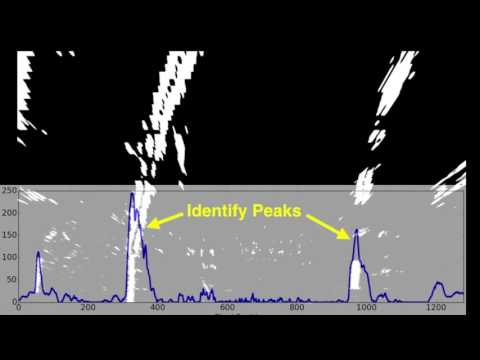

In [49]:
render_youtube_video('siAMDK8C_x8')

### 34. Measuring Curvature

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/2f928913-21f6-4611-9055-01744acc344f)

You're getting very close to a final result! You have a thresholded image, where you've estimated which pixels belong to the left and right lane lines (shown in red and blue, respectively, below). Now you need to fit a polynomial to those pixel positions.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/58449a23_color-fit-lines/color-fit-lines.jpg)

Second Degree Polynomial (i.e., quadratic polynomial/equation) learning resources:

[Second Degree Polynomials](https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/Second/Second.html)

Here I have fit the left and right lines with a second order polynomial shown in green.

Once you've located the lane line pixels, you can use the x and y positions of those pixels to fit a polynomial curve. In this case, you’ll fit a **second order polynomial**:

![](img/34_second_order_polynomial.png)

You'll want to fit for _f(y)_, rather than _f(x)_, because the lane lines in the warped image are near vertical and may have the same _x_ value for more than one _y_ value.

#### Radius of Curvature

The radius of curvature ([awesome tutorial here](http://www.intmath.com/applications-differentiation/8-radius-curvature.php)) at any point _x_ of the function _x=f(y)_ is given as follows:

![](img/34_radius_curvature.png)

In the case of the second order polynomial above, the first and second derivatives are:

![](img/34_first_and_second_derivatives.png)

So, our equation for radius of curvature becomes:

![](img/34_radius_of_curvature_equation.png)

The _y_ values of your image increase from top to bottom, so if, for example, you wanted to measure the radius of curvature closest to your vehicle, you could evaluate the formula above at the _y_ value corresponding to the bottom of your image, or in Python, at **yvalue = image.shape[0]**.

#### Here's an example in code to demonstrate this:

```python
import numpy as np
# Generate some fake data to represent lane-line pixels
yvals = np.linspace(0, 100, num=101)*7.2  # to cover same y-range as image
leftx = np.array([200 + (elem**2)*4e-4 + np.random.randint(-50, high=51) 
                              for idx, elem in enumerate(yvals)])
leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = np.array([900 + (elem**2)*4e-4 + np.random.randint(-50, high=51) 
                                for idx, elem in enumerate(yvals)])
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

# Fit a second order polynomial to each fake lane line
left_fit = np.polyfit(yvals, leftx, 2)
left_fitx = left_fit[0]*yvals**2 + left_fit[1]*yvals + left_fit[2]
right_fit = np.polyfit(yvals, rightx, 2)
right_fitx = right_fit[0]*yvals**2 + right_fit[1]*yvals + right_fit[2]

# Plot up the fake data
plt.plot(leftx, yvals, 'o', color='red')
plt.plot(rightx, yvals, 'o', color='blue')
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, yvals, color='green', linewidth=3)
plt.plot(right_fitx, yvals, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
```

#### And here is the output:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5844bfd6_fake-line-fits/fake-line-fits.jpg)

Now we have polynomial fits and we can calculate the radius of curvature as follows:

```python
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(yvals)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) \
                             /np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) \
                                /np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1163.9    1213.7
```

But now we need to stop and think... We've calculated the radius of curvature based on pixel values, so the radius we are reporting is in pixel space, which is not the same as real world space. So we actually need to repeat this calculation after converting our x and y values to real world space.

This involves measuring how long and wide the section of lane is that we're projecting in our warped image. We could do this in detail by measuring out the physical lane in the field of view of the camera, but for this project, you can assume that if you're projecting a section of lane similar to the images above, the lane is about 30 meters long and 3.7 meters wide. Or, if you prefer to derive a conversion from pixel space to world space in your own images, compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, and the dashed lane lines are 10 feet or 3 meters long each.

So here's a way to repeat the calculation of radius of curvature after correcting for scale in x and y:

```python
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meteres per pixel in x dimension

left_fit_cr = np.polyfit(yvals*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(yvals*ym_per_pix, rightx*xm_per_pix, 2)
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 3380.7 m    3189.3 m
```

Check out the [U.S. government specifications for highway curvature](http://onlinemanuals.txdot.gov/txdotmanuals/rdw/horizontal_alignment.htm#BGBHGEGC) to see how your numbers compare. There's no need to worry about absolute accuracy in this case, but your results should be "order of magnitude" correct.

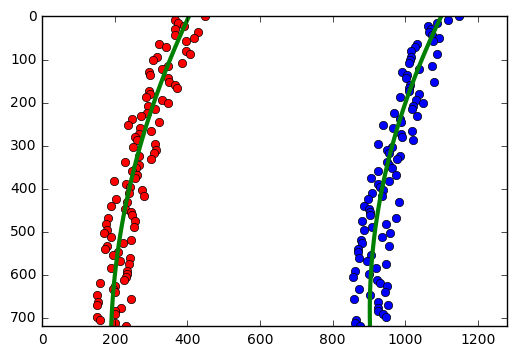

In [50]:
import numpy as np
# Generate some fake data to represent lane-line pixels
yvals = np.linspace(0, 100, num=101)*7.2  # to cover same y-range as image
leftx = np.array([200 + (elem**2)*4e-4 + np.random.randint(-50, high=51) 
                              for idx, elem in enumerate(yvals)])
leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = np.array([900 + (elem**2)*4e-4 + np.random.randint(-50, high=51) 
                                for idx, elem in enumerate(yvals)])
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

# Fit a second order polynomial to each fake lane line
left_A, left_B, left_C = np.polyfit(yvals, leftx, 2)
left_fitx = left_A*yvals**2 + left_B*yvals + left_C

right_A, right_B, right_C = np.polyfit(yvals, rightx, 2)
right_fitx = right_A*yvals**2 + right_B*yvals + right_C

# Plot up the fake data
plt.plot(leftx, yvals, 'o', color='red')
plt.plot(rightx, yvals, 'o', color='blue')
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, yvals, color='green', linewidth=3)
plt.plot(right_fitx, yvals, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [51]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(yvals)
left_curverad = ((1 + (2*left_A*y_eval + left_B)**2)**1.5) \
                             /np.absolute(2*left_A)
right_curverad = ((1 + (2*right_A*y_eval + right_B)**2)**1.5) \
                                /np.absolute(2*right_A)
print(left_curverad, right_curverad)

1412.17840844 1187.24499905


In [52]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meteres per pixel in x dimension

left_fit_cr = np.polyfit(yvals*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(yvals*ym_per_pix, rightx*xm_per_pix, 2)
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 3380.7 m    3189.3 m

2659.16251591 m 3296.97360807 m


#### 35. Tips and Tricks for the Project

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/7ee45090-7366-424b-885b-e5d38210958f)

In this lesson, you've acquired some new tools to help you find and track the lane lines. By all means, you are welcome and encouraged to use the techniques you used in the first project, like region masking, edge detection, color selection and Hough Transforms.

However, we encourage you to take each of these techniques to the next level! For region masking, try allowing for a complex region shape defined by the position of the lane lines in your last frame of video. For edge detection, compare the result of **cv2.Canny()** with a combined gradient magnitude and direction threshold. For color selection, look at alternative color spaces and selections. And if you would like to use Hough Transforms, look up fitting curves with Hough, rather than just straight lines.

Here are some other tips and tricks for building a robust pipeline:

#### Keeping track of recent measurements

After you've tuned your pipeline on test images, you'll run on a video stream, just like in the first project. In this case, however, you're going to keep track of things like where your last several detections of the lane lines were, what the curvature was etc., so you can properly treat new detections. To do this, it's useful to define a **Line()** class to keep track of all the interesting parameters you measure from frame to frame. Here's an example:

```python
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
```

You can create an instance of the Line() class for the left and right lane lines to keep track of recent detections and to perform sanity checks.

#### Automatically determining if your detected lines are the real thing

Ok, so your algorithm found some lines, but before moving on, you should check that the detection makes sense. To confirm that your detected lane lines are real, you might consider:

* Checking that they have similar curvature
* Checking that they are separated by approximately the right distance horizontally
* Checking that they are roughly parallel

#### After determining you found the lines, where to look in the next frame

Once you've found the lane lines in one frame of video, and you are reasonably confident they are actually the lines you are looking for, you don't need to search blindly in the next frame. You can simply search within a window around the previous detection. For example, if you fit a polynomial, then for each y position, you have an x position that represents the lane center from the last frame. Search for the new line within +/- some margin around the old line center. Then check that your new line detections makes sense, i.e., expected curvature, separation, and parallel.

#### If you lose track of the lines

If your sanity checks reveal that the lane lines you've detected are problematic for some reason, you can simply assume it was a bad or difficult frame of video, retain the previous positions from the frame prior and step to the next frame to search again. If you lose the lines for several frames in a row, you should probably go back to the blind search method using a histogram and sliding window, or other method, to re-establish your measurement.

#### Smoothing your measurement

Even when everything is working, your line detections will jump around from frame to frame a bit and it can be preferable to smooth over the last n frames of video to obtain a cleaner result. Each time you get a new high-confidence measurement, you can append it to the list of recent measurements and then take an average over n past measurements to obtain the lane position you want to draw onto the image.

#### Drawing the lines back down onto the road

Once you have a good measurement of the line positions in warped space, it's time to project your measurement back down onto the road! Let's suppose, as in the previous example, you have a warped binary image called warped, and you have fit the lines with a polynomial and have arrays called yvals, left_fitx and right_fitx, which represent the x and y pixel values of the lines. You can then project those lines onto the original image as follows:

```python
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, yvals]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, yvals])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)
```

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5844e7d1_lane-drawn/lane-drawn.jpg)

Original (undistorted) image with lane area drawn

### 36. Onward with the Project!

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/concepts/6bbc9eef-1fec-423b-868e-303d93ad1618#)

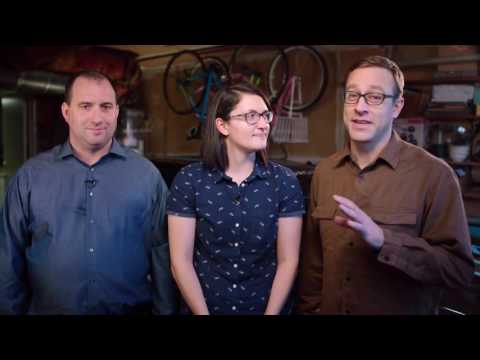

In [53]:
render_youtube_video('oYHg46OYpsM')

### Project: Advanced Lane Finding

[classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/40ec78ee-fb7c-4b53-94a8-028c5c60b858/project)

#### Project Submission
#### The Goal of this Project

In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in [the project repository](https://github.com/udacity/CarND-Advanced-Lane-Lines). There is an [writeup template](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) in the repostitory provided as a starting point for your writeup of the project.

#### The Writeup

The writeup you create for this project will be the primary output or product you are expected to submit (along with your code of course).

A great writeup should include the rubric points as well as your description of how you addressed each point. You should include a detailed description of the code used in each step (with line-number references and code snippets where necessary), and links to other supporting documents or external references. You should include images in your writeup to demonstrate how your code works with examples. Checkout the [writeup template](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) in the [project repo](https://github.com/udacity/CarND-Advanced-Lane-Lines) as a starting point.

All that said, please be concise! We're not looking for you to write a book here, just a brief description of how you passed each rubric point, and references to the relevant code :).

You're not required to use markdown for your writeup. If you use another method please just submit a pdf of your writeup.

#### Your Code

Your code should be commented well and stand on its own as readable material. You should explain in code comments as well as in your writeup how your code works and why you wrote it that way. In short, you want to make it easy for a reviewer to understand your code and how you used it in your project. You are more than welcome to use code from the lesson or elsewhere but if you copy/paste something, just make sure to explain how it works and why you are using it.

#### What it Takes to Pass

Check out the [project rubric](https://review.udacity.com/#!/rubrics/571/view) for details on what the requirements are for a passing submission. Your writeup should include each rubric point and your description of how you addressed that point in your submission. The [project repo](https://github.com/udacity/CarND-Advanced-Lane-Lines) provides an [example template](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) for your writeup.

There is no starter code provided, but you are welcome to use code from the lesson and quizzes as you like. You may complete the project in a Jupyter notebook, but it's not required. Feel free to build it as a standalone project.

To help the reviewer evaluate your project, please save example images from each stage of your pipeline to the **output_images** folder and provide a description of what each image shows in your writeup for the project. Please also save your output video and include it with your submission.

#### Evaluation

Once you have completed your project, double check the [Project Rubric](https://review.udacity.com/#!/rubrics/571/view) to make sure you have addressed all the rubric points. Your project will be evaluated by a Udacity reviewer according to that same rubric.

Your project must "meet specifications" in each category in order for your submission to pass. If you are happy with your submission, then you are ready to submit! If you see room for improvement in **any** category in which you do not meet specifications, keep working!

#### Submission

What to include in your submission
Include a zipped file with your writeup and all your code (or Jupyter Notebook) and example output images and video. Alternatively, you may submit a link to your GitHub repo for your project. In either case, **Remember to include example images for each stage of your pipeline and your final output video in your submission.**

#### Ready to submit your project?

Click on the "Submit Project" button and follow the instructions to submit!